# IMPORT

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import warnings
import calendar
from sklearn.preprocessing import MinMaxScaler
from matplotlib.patches import Rectangle
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("muhammadehsan02/us-stock-market-and-commodities-data-2020-2024")

# print("Path to dataset files:", path)

In [3]:
df = pd.read_csv('/home/muhammad-rafif-rizqullah/Documents/Belajar/Portofolio/data_analyst/Us_stock_commodity_analyst/US_stock_commodity/US_Stock_Data.csv')
df.describe()

Unnamed: 0  Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  \
count  1013.000000        1013.000000       1009.000000      1013.000000   
mean    506.000000           3.726667     129091.932607        69.853475   
std     292.572213           1.943030      64035.426727        21.986697   
min       0.000000           1.482000       1200.000000       -37.630000   
25%     253.000000           2.447000      88680.000000        54.760000   
50%     506.000000           2.880000     125980.000000        72.910000   
75%     759.000000           4.805000     164810.000000        82.810000   
max    1012.000000           9.647000     381970.000000       123.700000   

       Crude_oil_Vol.  Copper_Price    Copper_Vol.  Bitcoin_Vol.  \
count    9.900000e+02   1013.000000     976.000000  1.013000e+03   
mean     3.571739e+05      3.726843   37606.752049  4.924137e+07   
std      1.864309e+05      0.646524   39192.315092  3.251389e+08   
min      1.702000e+04      2.100500      10.000000  2.600000e+02   
25%      2.751800e+05      3.408000     380.000000  7.142000e+04   
50%      3.450350e+05      3.800500   31635.000000  1.288800e+05   
75%      4.269225e+05      4.251500   70982.500000  3.860000e+05   
max      1.770000e+06      4.937500  176040.000000  4.470000e+09   

       Platinum_Vol.  Ethereum_Vol.  ...  Nvidia_Price   Nvidia_Vol.  \
count     636.000000   1.013000e+03  ...   1013.000000  1.013000e+03   
mean     9082.515723   1.958002e+07  ...    219.738065  4.629821e+07   
std      8876.538587   1.469409e+08  ...    128.668703  1.878815e+07   
min         0.000000   7.518000e+04  ...     49.100000  9.790000e+06   
25%      1120.000000   5.272300e+05  ...    131.980000  3.348000e+07   
50%      6070.000000   9.665800e+05  ...    179.130000  4.368000e+07   
75%     15287.500000   3.670000e+06  ...    272.470000  5.640000e+07   
max     42830.000000   1.790000e+09  ...    661.600000  1.534600e+08   

       Berkshire_Vol.  Netflix_Price  Netflix_Vol.  Amazon_Price  \
count     1013.000000    1013.000000  1.013000e+03   1013.000000   
mean      2918.400790     422.035479  7.012043e+06    137.426209   
std       2715.637488     119.765870  6.788094e+06     27.321896   
min        120.000000     166.370000  1.140000e+06     81.820000   
25%        760.000000     338.630000  3.780000e+06    114.770000   
50%       2040.000000     431.600000  5.380000e+06    142.300000   
75%       4090.000000     509.640000  7.890000e+06    161.060000   
max      13850.000000     691.690000  1.333900e+08    186.570000   

        Amazon_Vol.   Meta_Price     Meta_Vol.      Gold_Vol.  
count  1.013000e+03  1013.000000  1.013000e+03    1011.000000  
mean   7.452566e+07   252.151046  2.504895e+07  189442.393670  
std    3.376809e+07    72.949246  1.635122e+07  104007.872337  
min    2.162000e+07    88.910000  5.470000e+06       0.000000  
25%    5.192000e+07   195.210000  1.612000e+07  142985.000000  
50%    6.515000e+07   262.010000  2.107000e+07  181200.000000  
75%    8.683000e+07   313.190000  2.903000e+07  231500.000000  
max    3.113500e+08   474.990000  2.304100e+08  813410.000000  

[8 rows x 31 columns]

# Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1013 non-null   int64  
 1   Date               1013 non-null   object 
 2   Natural_Gas_Price  1013 non-null   float64
 3   Natural_Gas_Vol.   1009 non-null   float64
 4   Crude_oil_Price    1013 non-null   float64
 5   Crude_oil_Vol.     990 non-null    float64
 6   Copper_Price       1013 non-null   float64
 7   Copper_Vol.        976 non-null    float64
 8   Bitcoin_Price      1013 non-null   object 
 9   Bitcoin_Vol.       1013 non-null   int64  
 10  Platinum_Price     1013 non-null   object 
 11  Platinum_Vol.      636 non-null    float64
 12  Ethereum_Price     1013 non-null   object 
 13  Ethereum_Vol.      1013 non-null   int64  
 14  S&P_500_Price      1013 non-null   object 
 15  Nasdaq_100_Price   1013 non-null   object 
 16  Nasdaq_100_Vol.    1012 

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

In [6]:
null_col = df.columns[df.isnull().sum() > 0]
null_col

Index(['Natural_Gas_Vol.', 'Crude_oil_Vol.', 'Copper_Vol.', 'Platinum_Vol.',
       'Nasdaq_100_Vol.', 'Silver_Vol.', 'Gold_Vol.'],
      dtype='object')

In [7]:
for col in null_col:
    df[col] = df[col].fillna(df[col].mean())

In [8]:
to_float = df.select_dtypes(include=['object'])
to_float.columns

Index(['Bitcoin_Price', 'Platinum_Price', 'Ethereum_Price', 'S&P_500_Price',
       'Nasdaq_100_Price', 'Berkshire_Price', 'Gold_Price'],
      dtype='object')

In [9]:
for col in to_float:
    try:
        df[col] = df[col].astype('float64')
    except :
        df[col] = df[col].str.replace(',','').astype('float64')

In [10]:
pd.set_option('display.max_columns', None)

In [11]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

Date  Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  \
0 2024-02-02              2.079     129091.932607            72.28   
1 2024-01-02              2.050     161340.000000            73.82   
2 2024-01-31              2.100     142860.000000            75.85   
3 2024-01-30              2.077     139750.000000            77.82   
4 2024-01-29              2.490       3590.000000            76.78   

   Crude_oil_Vol.  Copper_Price   Copper_Vol.  Bitcoin_Price  Bitcoin_Vol.  \
0   357173.919192        3.8215  37606.752049        43194.7         42650   
1   577940.000000        3.8535  37606.752049        43081.4         47690   
2   344490.000000        3.9060  37606.752049        42580.5         56480   
3   347240.000000        3.9110  37606.752049        42946.2         55130   
4   331930.000000        3.8790  37606.752049        43299.8         45230   

   Platinum_Price  Platinum_Vol.  Ethereum_Price  Ethereum_Vol.  \
0           901.6    9082.515723         2309.28         246890   
1           922.3    9082.515723         2304.28         323610   
2           932.6    9082.515723         2283.14         408790   
3           931.7    9082.515723         2343.11         387120   
4           938.3    9082.515723         2317.79         318840   

   S&P_500_Price  Nasdaq_100_Price  Nasdaq_100_Vol.  Apple_Price  Apple_Vol.  \
0        4958.61          17642.73      315620000.0       185.85   102550000   
1        4906.19          17344.71      240640000.0       186.86    53490000   
2        4848.87          17137.24      366450000.0       184.40    54830000   
3        4924.97          17476.71      236210000.0       188.04    55270000   
4        4927.93          17596.27      238750000.0       191.73    46890000   

   Tesla_Price  Tesla_Vol.  Microsoft_Price  Microsoft_Vol.  Silver_Price  \
0       187.91   110610000           411.22        28260000        22.796   
1       188.86    90680000           403.78        29230000        23.236   
2       187.29   102270000           397.58        46780000        23.169   
3       191.59   105540000           408.59        29340000        23.225   
4       190.93   123600000           409.72        23290000        23.134   

   Silver_Vol.  Google_Price  Google_Vol.  Nvidia_Price  Nvidia_Vol.  \
0  64216.80455        142.38     62500000        661.60     47660000   
1  85160.00000        141.16     37120000        630.27     36020000   
2  66910.00000        140.10     71370000        615.27     45070000   
3  53370.00000        151.46     33060000        627.74     39600000   
4    330.00000        153.51     27590000        624.65     33900000   

   Berkshire_Price  Berkshire_Vol.  Netflix_Price  Netflix_Vol.  Amazon_Price  \
0         589498.0           10580         564.64       4030000        171.81   
1         581600.0            9780         567.51       3150000        159.28   
2         578020.0            9720         564.11       4830000        155.20   
3         584680.0            9750         562.85       6120000        159.00   
4         578800.0           13850         575.79       6880000        161.26   

   Amazon_Vol.  Meta_Price  Meta_Vol.  Gold_Price     Gold_Vol.  
0    117220000      474.99   84710000      2053.7  189442.39367  
1     66360000      394.78   25140000      2071.1  260920.00000  
2     49690000      390.14   20010000      2067.4  238370.00000  
3     42290000      400.06   18610000      2050.9  214590.00000  
4     42840000      401.02   17790000      2034.9    1780.00000

# Correlation

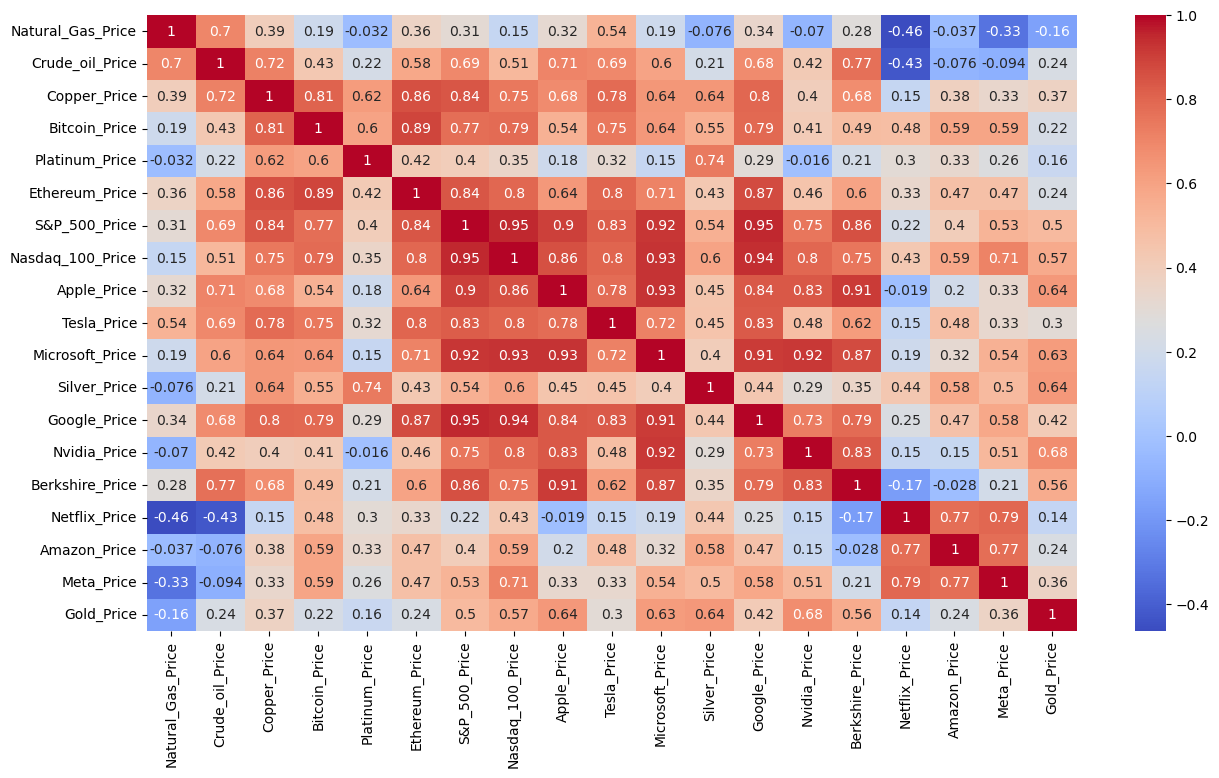

In [12]:
price_columns = [col for col in df.columns if 'Price' in col]

corr_price = df[price_columns].corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr_price, cmap='coolwarm', annot=True)
plt.show()

In [13]:
correlation = []
for target in price_columns :
    for col in price_columns:
         if col != target:
             corr_value = df[target].corr(df[col])

             if abs(corr_value) > 0.5:
                 correlation.append({
                     'Target' : target,
                     'Fitur' : col,
                     'Korelasi': corr_value
                 })
corr_df = pd.DataFrame(correlation)
corr_df = corr_df.sort_values('Korelasi', ascending=False)


In [14]:
df = df.set_index('Date')

In [15]:
pd.set_option('display.max_rows', None)
df = df.sort_index()
df = df[df.index.year != 2024]
norm_df = df[price_columns]

In [16]:
norm_df.tail()

Natural_Gas_Price  Crude_oil_Price  Copper_Price  Bitcoin_Price  \
Date                                                                          
2023-12-22              2.610            73.56        3.9050        43968.9   
2023-12-26              2.550            75.57        3.9020        42513.3   
2023-12-27              2.619            74.11        3.9560        43446.5   
2023-12-28              2.557            71.77        3.9245        42581.1   
2023-12-29              2.514            71.65        3.8915        42072.4   

            Platinum_Price  Ethereum_Price  S&P_500_Price  Nasdaq_100_Price  \
Date                                                                          
2023-12-22           981.8         2324.23        4754.63          16777.40   
2023-12-26           995.6         2230.74        4774.75          16878.46   
2023-12-27          1013.5         2378.63        4781.58          16906.80   
2023-12-28          1023.2         2344.47        4783.35          16898.47   
2023-12-29          1009.2         2299.24        4769.83          16825.93   

            Apple_Price  Tesla_Price  Microsoft_Price  Silver_Price  \
Date                                                                  
2023-12-22       193.60       252.54           374.58        24.565   
2023-12-26       193.05       256.61           374.66        24.396   
2023-12-27       193.15       261.44           374.07        24.570   
2023-12-28       193.58       253.18           375.28        24.372   
2023-12-29       192.53       248.48           376.04        24.025   

            Google_Price  Nvidia_Price  Berkshire_Price  Netflix_Price  \
Date                                                                     
2023-12-22        141.49        488.30         542600.0         486.76   
2023-12-26        141.52        492.79         543635.0         491.19   
2023-12-27        140.37        494.17         543750.0         491.79   
2023-12-28        140.23        495.22         545000.0         490.51   
2023-12-29        139.69        495.22         542625.0         486.88   

            Amazon_Price  Meta_Price  Gold_Price  
Date                                              
2023-12-22        153.42      353.39      2059.6  
2023-12-26        153.41      354.83      2060.4  
2023-12-27        153.34      357.83      2083.4  
2023-12-28        153.38      358.32      2083.5  
2023-12-29        151.94      353.96      2071.8

In [17]:
for column in norm_df[price_columns]:
    if column in norm_df.columns:
        first = norm_df[column].dropna().iloc[0]
        norm_df[column] = (norm_df[column] / first) * 100
        norm_df[column] = norm_df[column].rolling(window=30, min_periods=1).mean()

norm_df.head()

Natural_Gas_Price  Crude_oil_Price  Copper_Price  Bitcoin_Price  \
Date                                                                          
2020-01-04         100.000000       100.000000    100.000000     100.000000   
2020-01-05         109.546314        98.695224    103.051859     116.442720   
2020-01-06         110.291955       123.961924    106.608536     128.791143   
2020-01-07         109.042218       141.986706    111.324002     131.352339   
2020-01-09         119.080025       155.696701    116.801285     140.978233   

            Platinum_Price  Ethereum_Price  S&P_500_Price  Nasdaq_100_Price  \
Date                                                                          
2020-01-04      100.000000      100.000000     100.000000        100.000000   
2020-01-05      104.137116      128.136518     107.290225        108.227640   
2020-01-06      111.157465      146.353629     112.756392        114.891622   
2020-01-07      112.447851      152.325667     116.097956        120.495633   
2020-01-09      116.697260      192.006487     121.428456        129.237499   

            Apple_Price  Tesla_Price  Microsoft_Price  Silver_Price  \
Date                                                                  
2020-01-04   100.000000   100.000000       100.000000    100.000000   
2020-01-05   109.995019   122.819315       107.382815    103.411041   
2020-01-06   117.859317   144.049844       111.653847    113.818173   
2020-01-07   126.178815   166.168224       117.383801    117.932995   
2020-01-09   145.498921   231.595016       123.789363    135.314645   

            Google_Price  Nvidia_Price  Berkshire_Price  Netflix_Price  \
Date                                                                     
2020-01-04    100.000000    100.000000       100.000000     100.000000   
2020-01-05    109.773140    108.161922       102.435407     107.030048   
2020-01-06    116.581972    120.410290       103.454545     110.348458   
2020-01-07    120.149728    129.512918       103.143062     116.108410   
2020-01-09    126.156080    149.096594       107.581627     123.459679   

            Amazon_Price  Meta_Price  Gold_Price  
Date                                              
2020-01-04    100.000000  100.000000  100.000000  
2020-01-05    109.911940  113.367794  103.440367  
2020-01-06    116.448265  124.014202  105.621884  
2020-01-07    125.060279  130.220865  107.177642  
2020-01-09    136.731314  141.199248  110.612040

In [18]:
norm_df.describe()

Natural_Gas_Price  Crude_oil_Price  Copper_Price  Bitcoin_Price  \
count         990.000000       990.000000    990.000000     990.000000   
mean          235.820668       340.838325    170.091932     428.738383   
std           111.035776       103.451188     27.749629     207.515829   
min           100.000000        98.695224    100.000000     100.000000   
25%           156.900336       243.241835    150.004972     279.850694   
50%           187.508927       364.605285    175.764877     414.052070   
75%           303.105440       410.580174    194.035682     585.956491   
max           511.718126       530.830461    209.183876     867.359142   

       Platinum_Price  Ethereum_Price  S&P_500_Price  Nasdaq_100_Price  \
count      990.000000      990.000000     990.000000        990.000000   
mean       136.021477     1245.314092     159.655876        171.303024   
std         11.785162      718.969819      19.347719         25.042069   
min        100.000000      100.000000     100.000000        100.000000   
25%        128.525298      385.129798     143.490039        157.192313   
50%        133.509248     1290.897341     165.638757        175.823779   
75%        141.784348     1760.729643     174.940059        192.292992   
max        164.576090     2806.556342     184.685705        211.476762   

       Apple_Price  Tesla_Price  Microsoft_Price  Silver_Price  Google_Price  \
count   990.000000   990.000000       990.000000    990.000000    990.000000   
mean    231.367161   642.389951       171.101179    162.362553    194.016780   
std      51.129730   238.994046        31.351557     17.245723     40.113216   
min     100.000000   100.000000       100.000000    100.000000    100.000000   
25%     195.152471   491.858515       138.853680    150.166798    152.711283   
50%     242.923515   717.482866       174.510661    166.658681    204.512099   
75%     268.643671   802.064901       193.008514    172.771143    226.326376   
max     311.889424  1017.686397       236.318892    190.906512    249.837266   

       Nvidia_Price  Berkshire_Price  Netflix_Price  Amazon_Price  Meta_Price  \
count    990.000000       990.000000     990.000000    990.000000  990.000000   
mean     339.019145       160.055094     115.153586    143.233666  155.128378   
std      167.136083        29.466966      28.472189     23.048821   35.847666   
min      100.000000       100.000000      56.974108    100.000000   83.954261   
25%      204.520460       127.626051      95.678422    124.889838  126.967105   
50%      296.292030       163.507547     114.619955    137.607366  155.271930   
75%      401.036284       183.492743     139.530209    163.878639  183.926953   
max      751.180956       206.070354     173.100692    183.803683  221.526316   

       Gold_Price  
count  990.000000  
mean   114.965997  
std      5.358588  
min    100.000000  
25%    111.834025  
50%    114.183319  
75%    118.971660  
max    126.542667

In [19]:

norm_df = norm_df.dropna()

norm_df.head()

Natural_Gas_Price  Crude_oil_Price  Copper_Price  Bitcoin_Price  \
Date                                                                          
2020-01-04         100.000000       100.000000    100.000000     100.000000   
2020-01-05         109.546314        98.695224    103.051859     116.442720   
2020-01-06         110.291955       123.961924    106.608536     128.791143   
2020-01-07         109.042218       141.986706    111.324002     131.352339   
2020-01-09         119.080025       155.696701    116.801285     140.978233   

            Platinum_Price  Ethereum_Price  S&P_500_Price  Nasdaq_100_Price  \
Date                                                                          
2020-01-04      100.000000      100.000000     100.000000        100.000000   
2020-01-05      104.137116      128.136518     107.290225        108.227640   
2020-01-06      111.157465      146.353629     112.756392        114.891622   
2020-01-07      112.447851      152.325667     116.097956        120.495633   
2020-01-09      116.697260      192.006487     121.428456        129.237499   

            Apple_Price  Tesla_Price  Microsoft_Price  Silver_Price  \
Date                                                                  
2020-01-04   100.000000   100.000000       100.000000    100.000000   
2020-01-05   109.995019   122.819315       107.382815    103.411041   
2020-01-06   117.859317   144.049844       111.653847    113.818173   
2020-01-07   126.178815   166.168224       117.383801    117.932995   
2020-01-09   145.498921   231.595016       123.789363    135.314645   

            Google_Price  Nvidia_Price  Berkshire_Price  Netflix_Price  \
Date                                                                     
2020-01-04    100.000000    100.000000       100.000000     100.000000   
2020-01-05    109.773140    108.161922       102.435407     107.030048   
2020-01-06    116.581972    120.410290       103.454545     110.348458   
2020-01-07    120.149728    129.512918       103.143062     116.108410   
2020-01-09    126.156080    149.096594       107.581627     123.459679   

            Amazon_Price  Meta_Price  Gold_Price  
Date                                              
2020-01-04    100.000000  100.000000  100.000000  
2020-01-05    109.911940  113.367794  103.440367  
2020-01-06    116.448265  124.014202  105.621884  
2020-01-07    125.060279  130.220865  107.177642  
2020-01-09    136.731314  141.199248  110.612040

In [20]:
norm_df.columns

Index(['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Bitcoin_Price',
       'Platinum_Price', 'Ethereum_Price', 'S&P_500_Price', 'Nasdaq_100_Price',
       'Apple_Price', 'Tesla_Price', 'Microsoft_Price', 'Silver_Price',
       'Google_Price', 'Nvidia_Price', 'Berkshire_Price', 'Netflix_Price',
       'Amazon_Price', 'Meta_Price', 'Gold_Price'],
      dtype='object')

# EDA Musiman

In [53]:
colors = sns.color_palette("husl", len(price_columns))
colors

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.9705775079733928, 0.46143284772231, 0.28979095908135083),
 (0.8496488250147538, 0.5429540581547583, 0.1953809727605662),
 (0.7497092209864964, 0.5894242557876208, 0.19455262492454897),
 (0.6629691847431481, 0.6209277060451596, 0.19393867975875853),
 (0.5649018195869859, 0.6488728885581352, 0.19335750241505215),
 (0.4087541573061243, 0.6801520094041232, 0.19266508069529747),
 (0.19676219381987314, 0.6970199119446676, 0.3702146435999101),
 (0.2035831592655869, 0.6874704948240249, 0.5265550522951161),
 (0.20832119067938082, 0.6805187493576585, 0.6098139052117088),
 (0.21258221269121125, 0.6740330523345707, 0.6753189809224965),
 (0.21739943626699837, 0.666422268294729, 0.7421212480192143),
 (0.22448490162661833, 0.6546615320483039, 0.8305776721504128),
 (0.32740210980958234, 0.6237397227917356, 0.9586391193089515),
 (0.5960571880781582, 0.5654734853503418, 0.958339538335483),
 (0.7679423872249482, 0.49490912934433967, 0.9580258929980913),
 (0.9390990007854232, 0.3741832400236842, 0.9576072568792121),
 (0.9619098982439197, 0.3945850625037109, 0.814402727666576),
 (0.9650423664312789, 0.42017818514968486, 0.6849284923377322)]

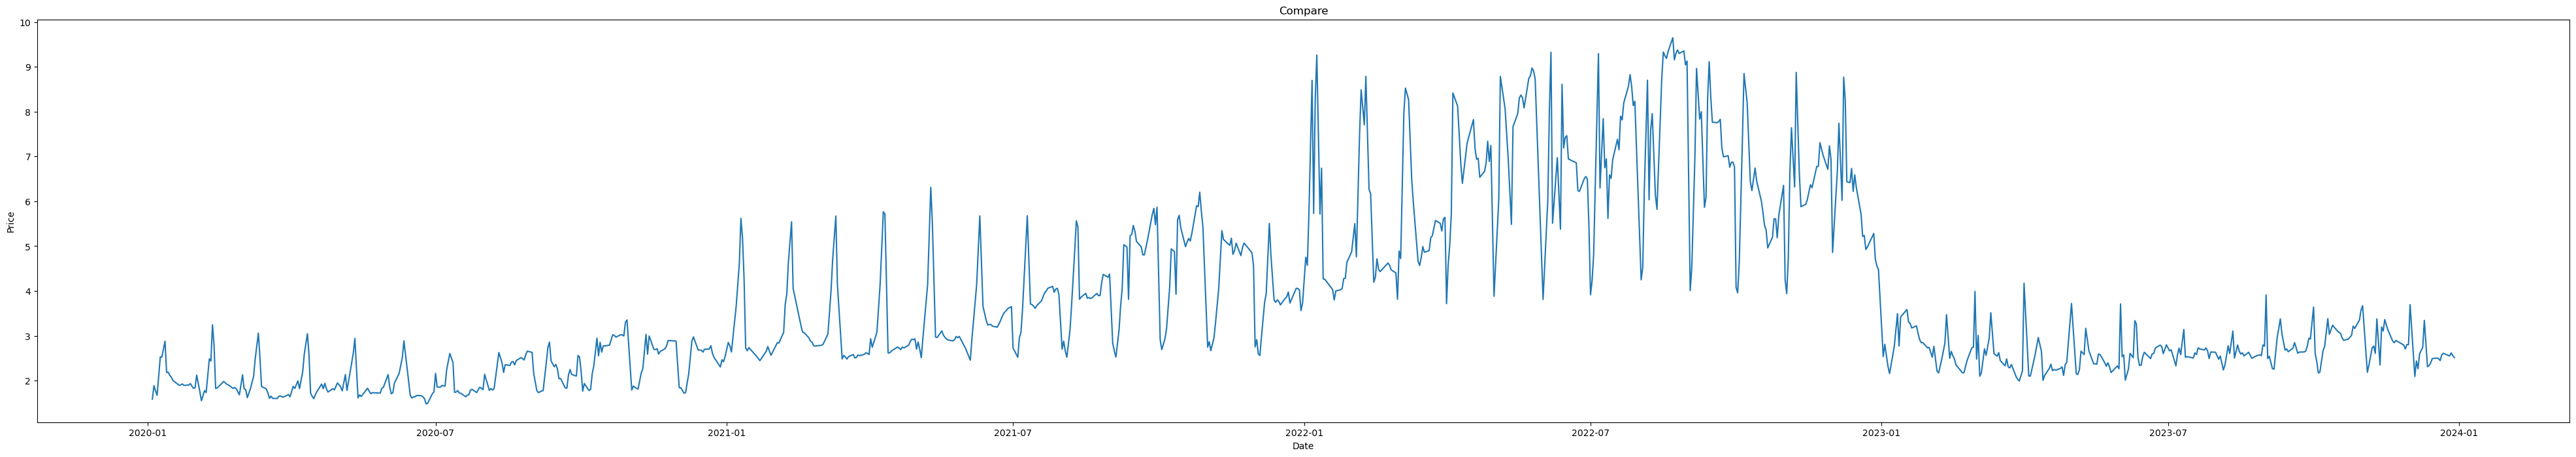

In [21]:
plt.figure(figsize=(50,8))
plt.plot(df['Natural_Gas_Price'])

plt.title('Compare')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

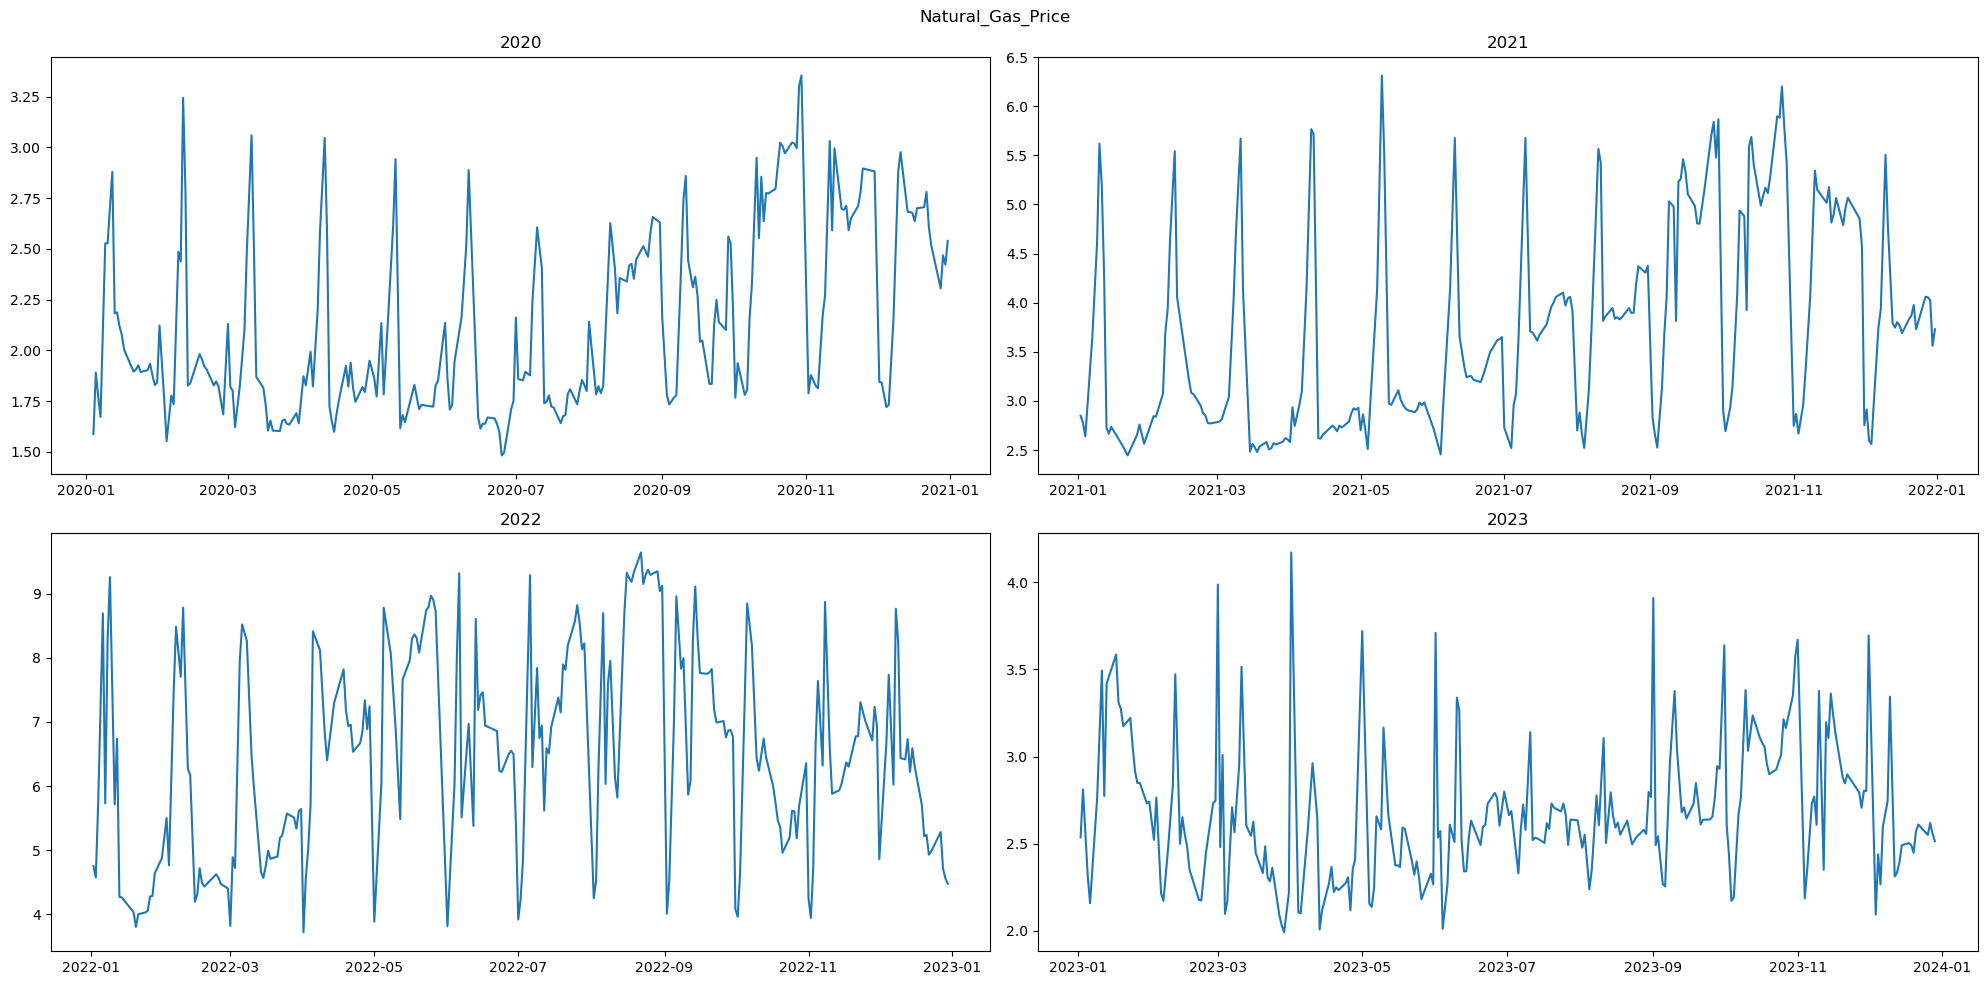

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

feature = "Natural_Gas_Price"

fig.suptitle(feature)

year = df.index.year.unique()

for i, year in enumerate(year):
  ax = axes[i//2, i%2]

  year_df = df[df.index.year == year]

  ax.plot(year_df.index, year_df[feature], label=feature)
  ax.set_title(f'{year}')

plt.tight_layout()
plt.show()


In [23]:
df_2020 = df[df.index.year == 2020]
month_2020 = df_2020.index.month.unique()

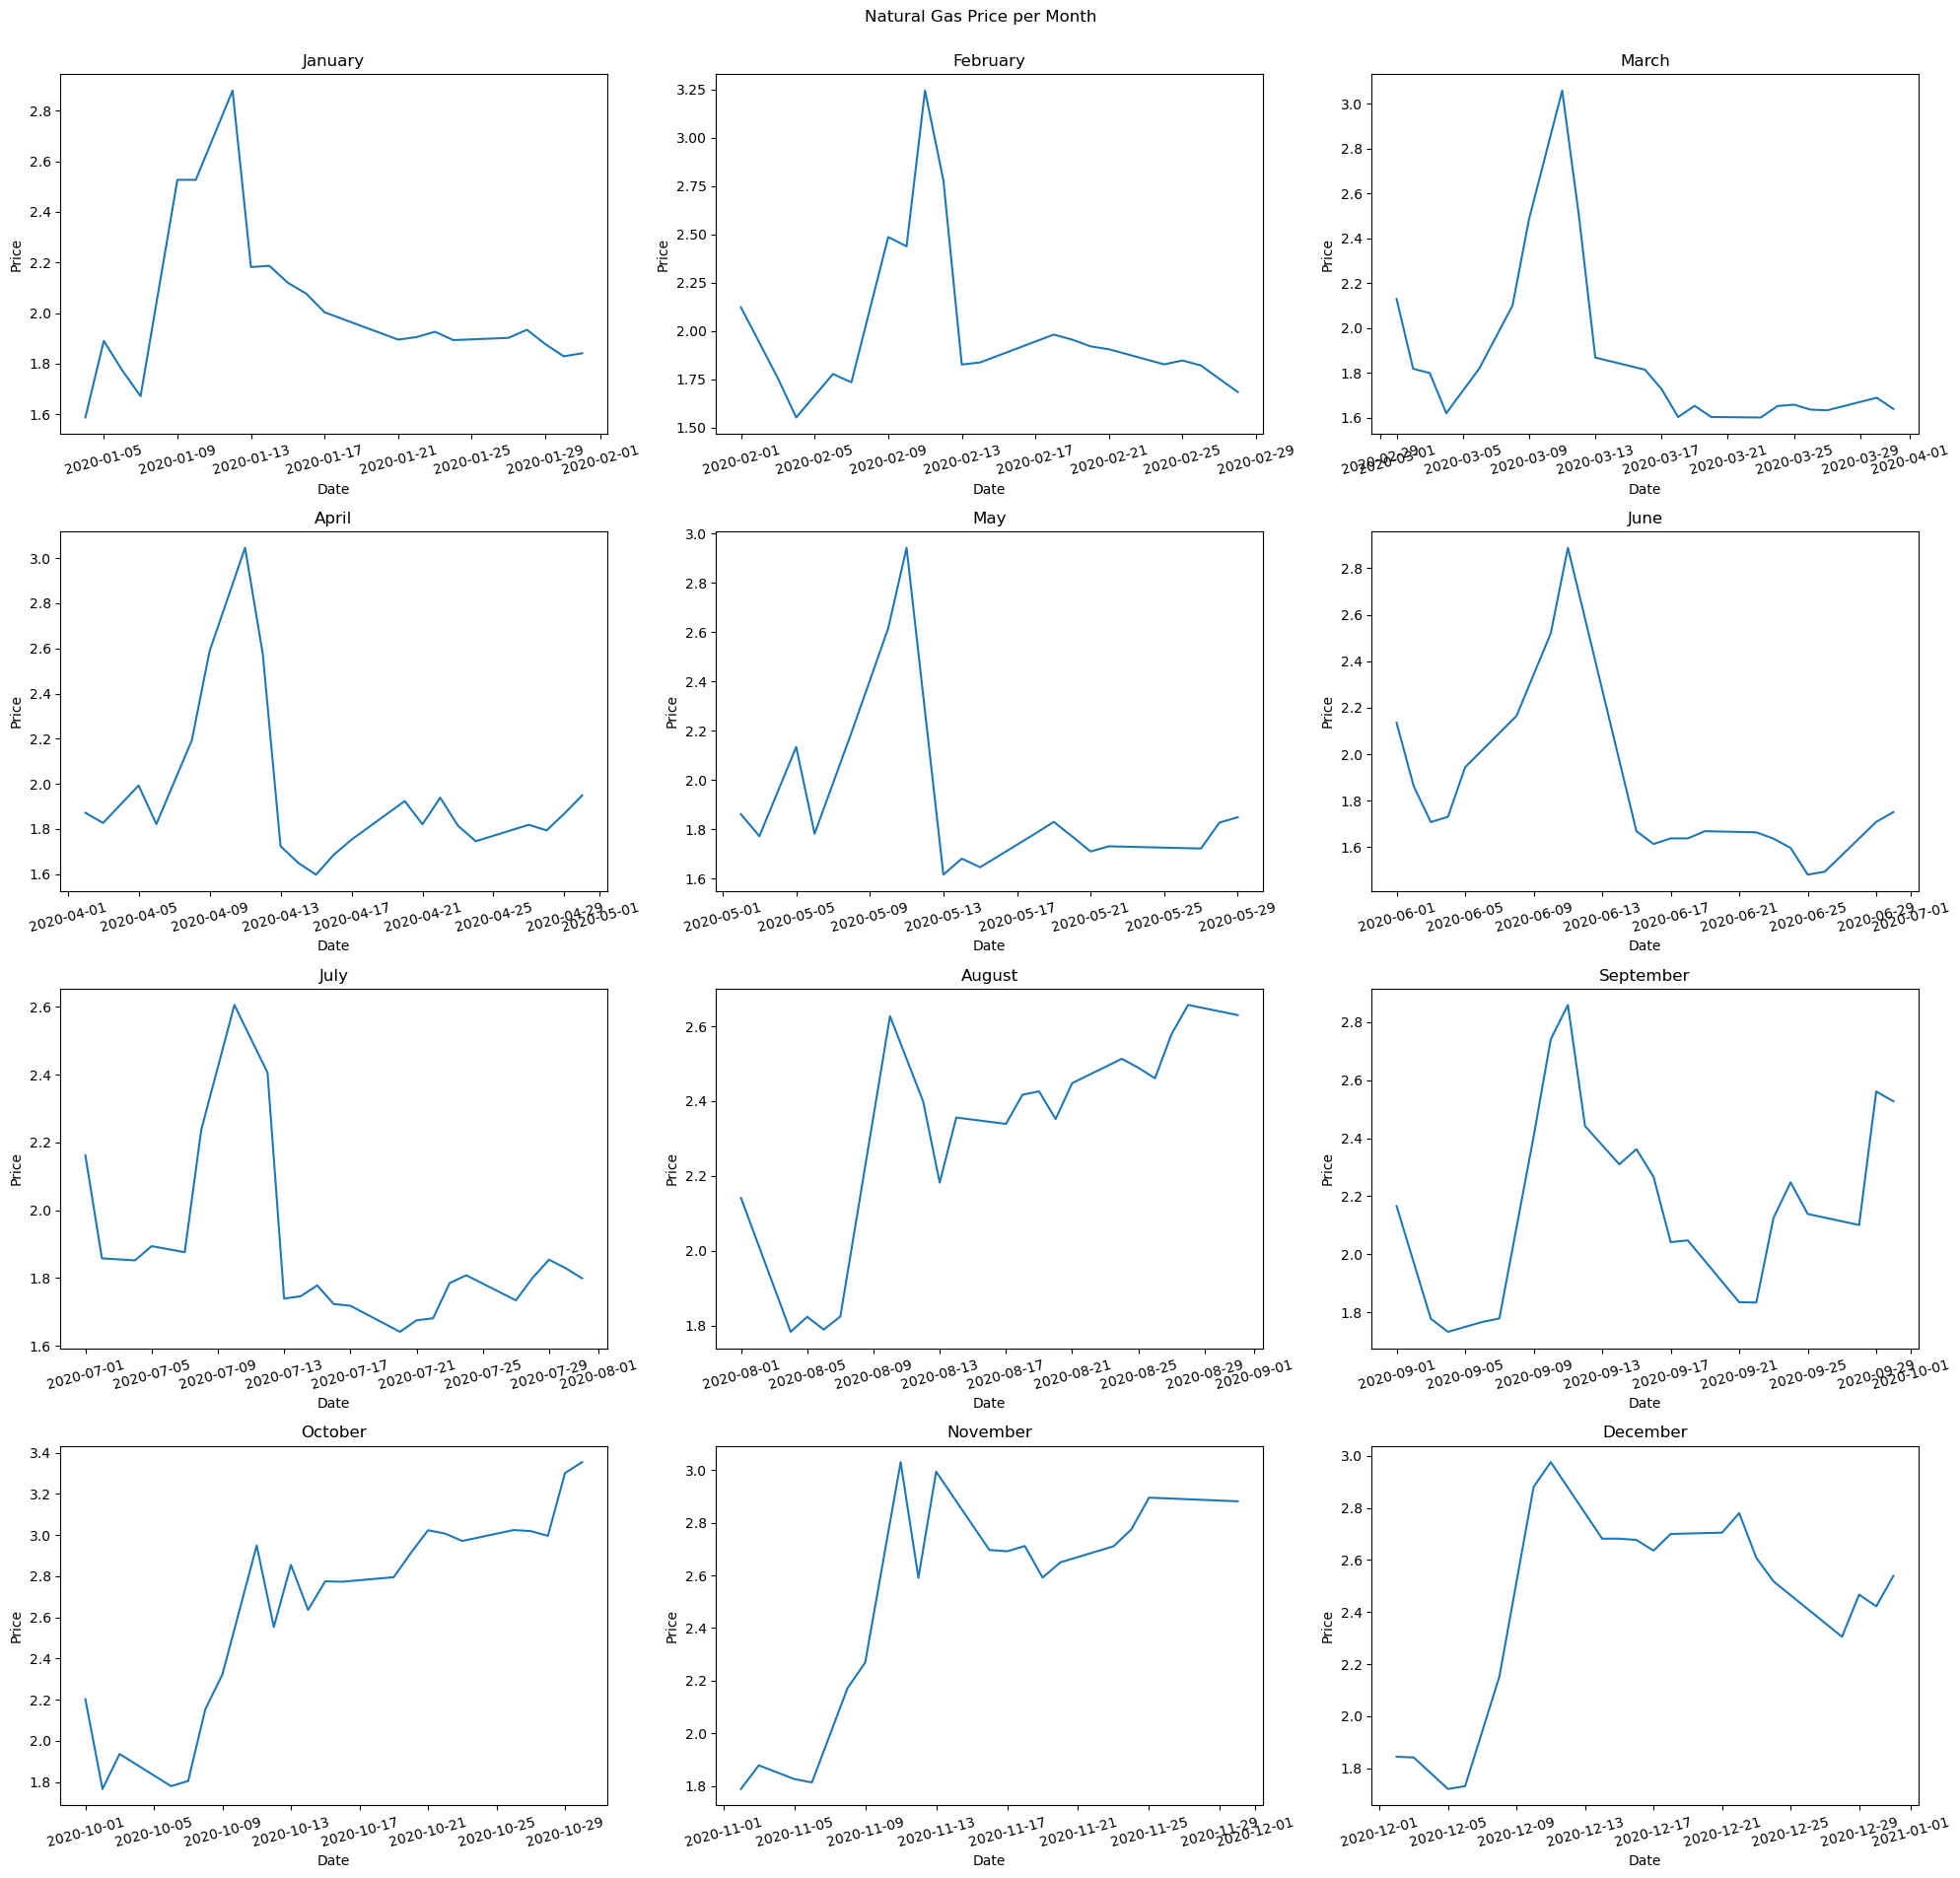

In [24]:
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
fig.suptitle('Natural Gas Price per Month', y=0.98)

df_2020 = df[df.index.year == 2020]
month_2020 = df_2020.index.month.unique()

for i, month in enumerate(month_2020):
  ax = axes[i//3, i%3]

  month_df = df_2020[df_2020.index.month == month]

  ax.plot(month_df.index, month_df['Natural_Gas_Price'], label='Natural Gas Price')
  ax.set_title(f'{calendar.month_name[month]}')
  ax.tick_params(axis='x', rotation=15)
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()



In [25]:
for i, month in enumerate(month_2020):
  month_df = df_2020[df_2020.index.month == month]
  print(f"{calendar.month_name[month]}")
  print(f"harga awal : {month_df['Natural_Gas_Price'].iloc[0]}")
  print(f"harga akhir : {month_df['Natural_Gas_Price'].iloc[-1]}")
  print(f"harga tertinggi : {month_df['Natural_Gas_Price'].max()} pada tanggal {month_df['Natural_Gas_Price'].idxmax()}")
  print(f"harga terendah : {month_df['Natural_Gas_Price'].min()} pada tanggal {month_df['Natural_Gas_Price'].idxmin()}")


January
harga awal : 1.587
harga akhir : 1.841
harga tertinggi : 2.88 pada tanggal 2020-01-12 00:00:00
harga terendah : 1.587 pada tanggal 2020-01-04 00:00:00
February
harga awal : 2.122
harga akhir : 1.684
harga tertinggi : 3.244 pada tanggal 2020-02-11 00:00:00
harga terendah : 1.552 pada tanggal 2020-02-04 00:00:00
March
harga awal : 2.13
harga akhir : 1.64
harga tertinggi : 3.059 pada tanggal 2020-03-11 00:00:00
harga terendah : 1.602 pada tanggal 2020-03-23 00:00:00
April
harga awal : 1.872
harga akhir : 1.949
harga tertinggi : 3.046 pada tanggal 2020-04-11 00:00:00
harga terendah : 1.598 pada tanggal 2020-04-15 00:00:00
May
harga awal : 1.861
harga akhir : 1.849
harga tertinggi : 2.942 pada tanggal 2020-05-11 00:00:00
harga terendah : 1.616 pada tanggal 2020-05-13 00:00:00
June
harga awal : 2.135
harga akhir : 1.751
harga tertinggi : 2.888 pada tanggal 2020-06-11 00:00:00
harga terendah : 1.482 pada tanggal 2020-06-25 00:00:00
July
harga awal : 2.162
harga akhir : 1.799
harga ter

# EDA Correlation

In [26]:
def corr_value(ax, norm_df, feature):
  if feature in norm_df.columns:
    correlation = []

    for col in norm_df.columns:
      if col != feature:
        corr_value = norm_df[feature].corr(norm_df[col])
        correlation.append(corr_value)
      else :
        correlation.append(0.1)

    corr_data = pd.DataFrame([correlation], index=[feature], columns=norm_df.columns.tolist())

    sns.heatmap(corr_data, cmap='coolwarm', annot=True, ax=ax, fmt='.3f')
    ax.set_title(f'Korelasi dengan {feature}')


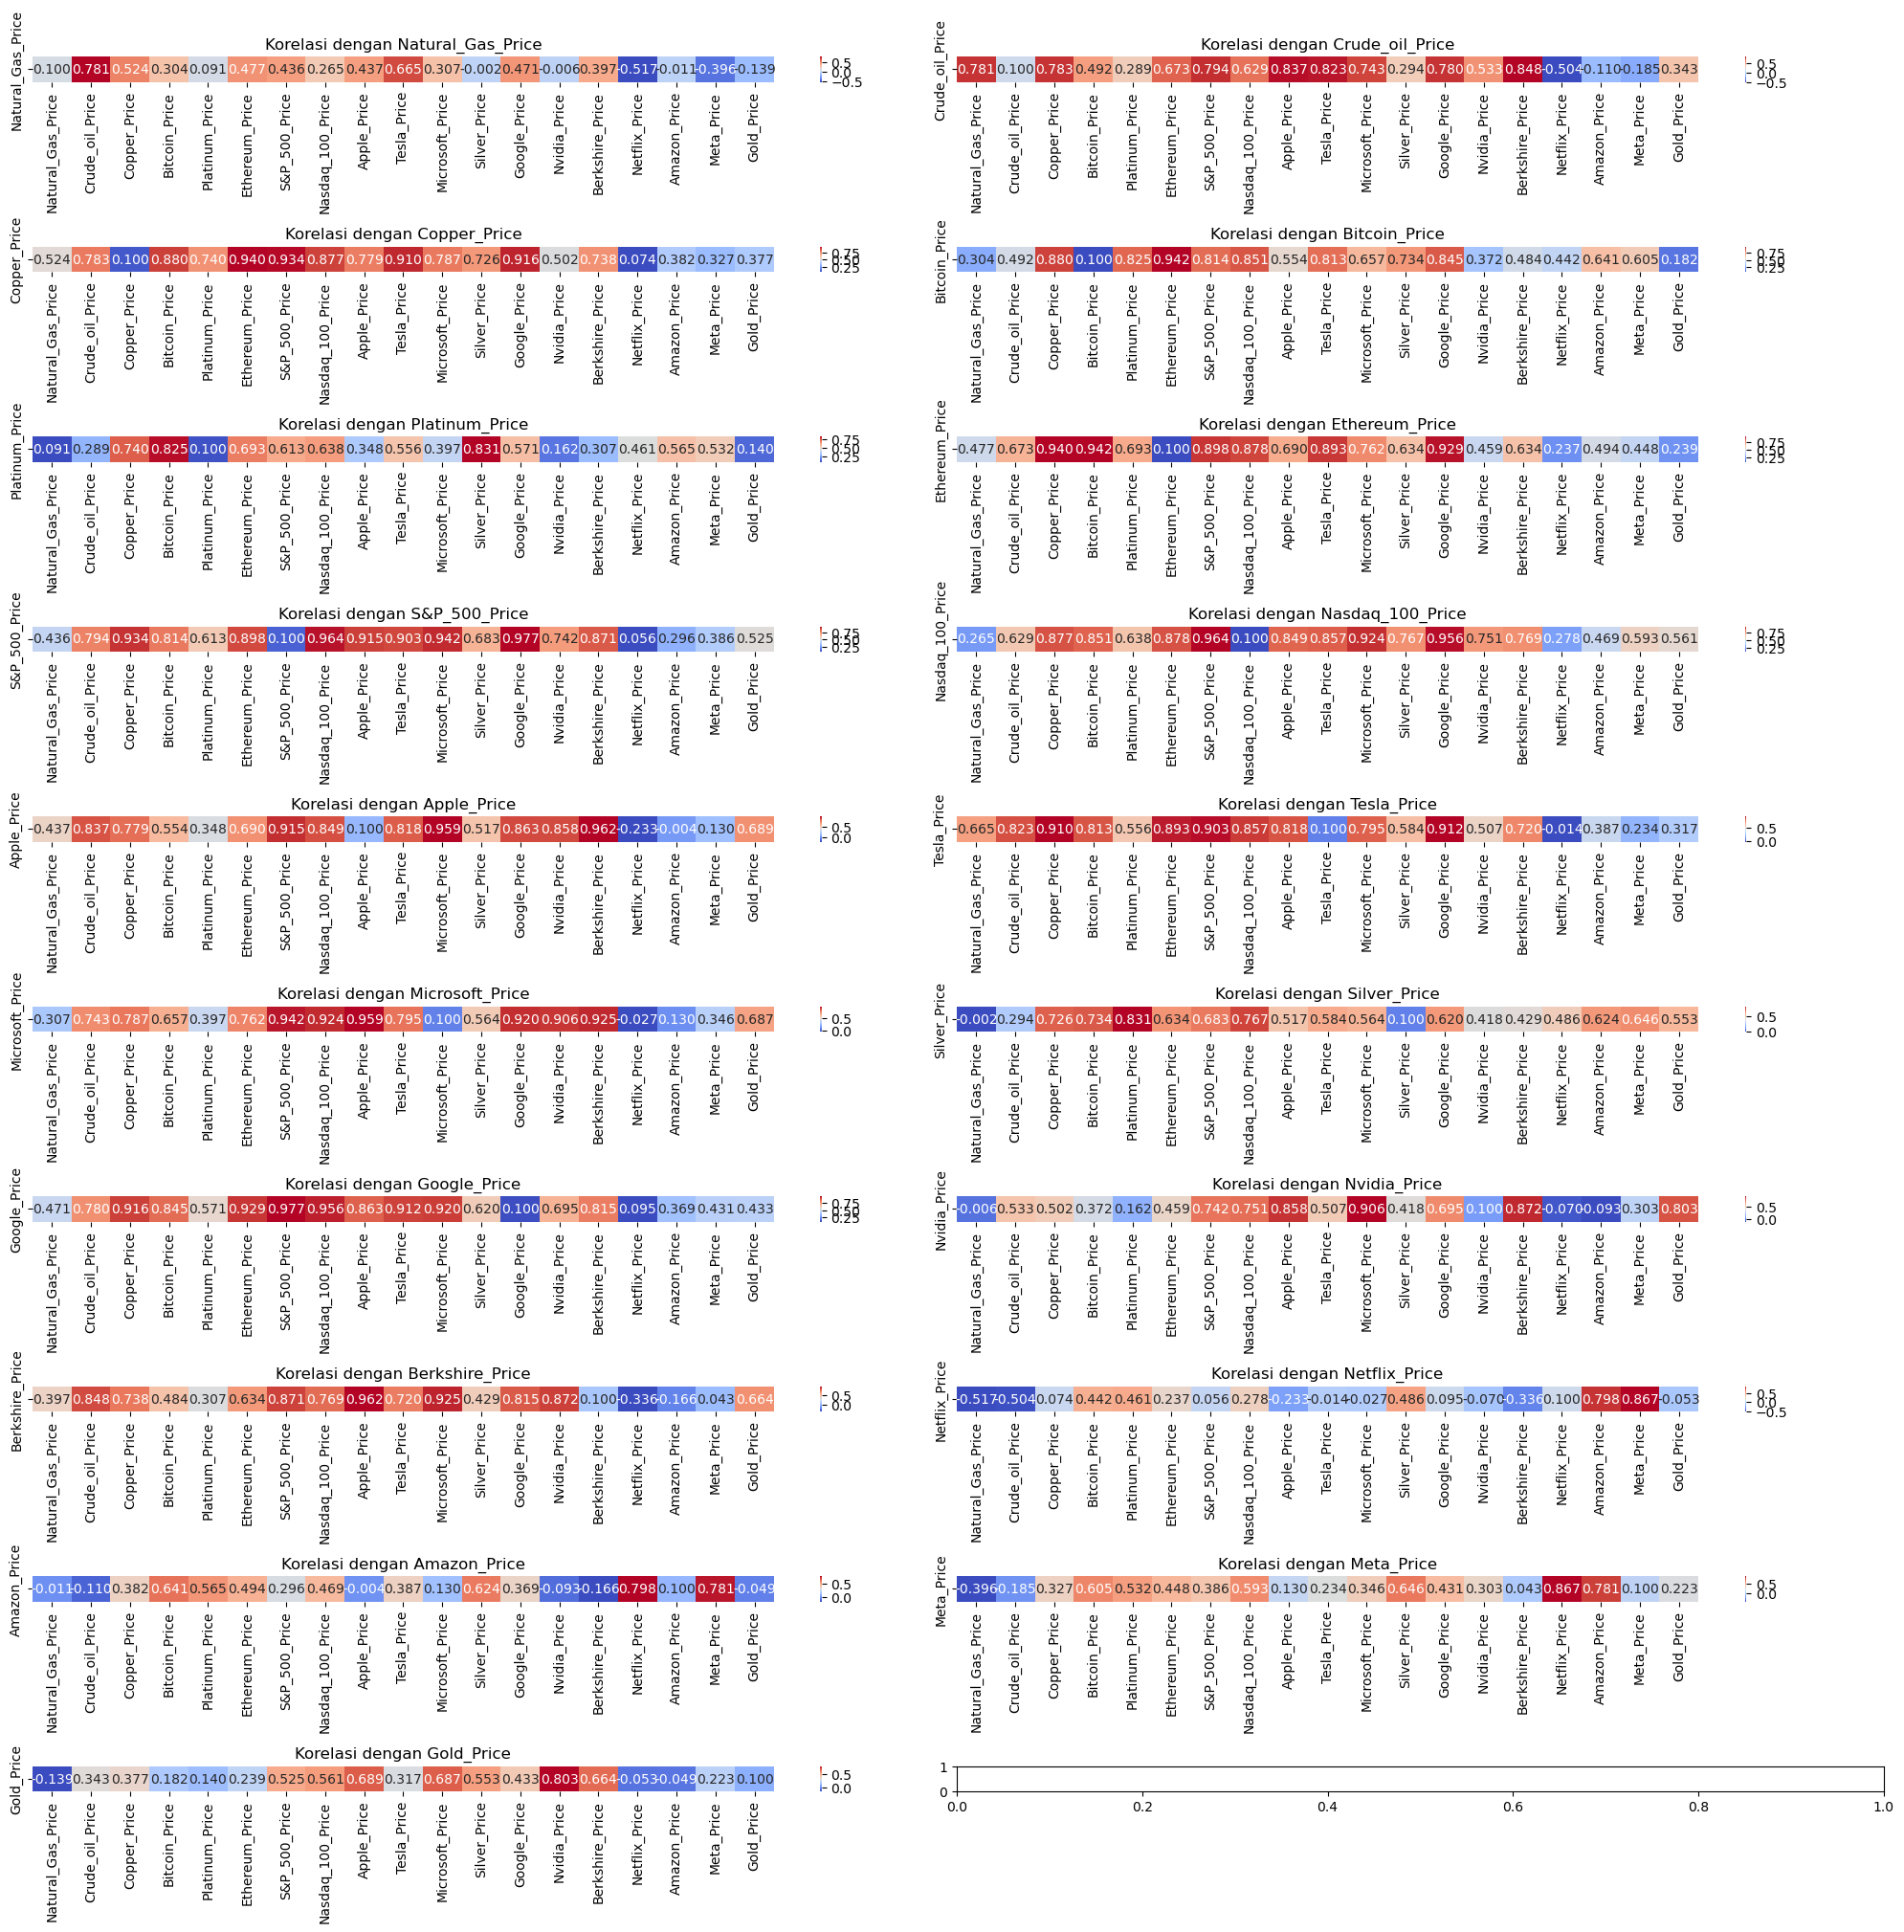

In [27]:
fig, axes = plt.subplots(10, 2, figsize=(20, 20))
axes = axes.flatten()

for i, feature in enumerate(norm_df.columns.tolist()):
  corr_value(axes[i], norm_df, feature)

plt.tight_layout()
plt.show()


In [28]:
def plot_correlation_feature(ax, target, corr_df, norm_df, corr):

  if target in norm_df.columns:
      ax.plot(norm_df[target], label=target,
              linewidth=2, color='red')

  filter = corr_df[(corr_df['Target'] == target) & (corr_df['Korelasi'] > corr)]

  dict_corr = dict(zip(filter['Fitur'], filter['Korelasi']))

  for fitur, corr in dict_corr.items():
    if fitur != target:
      ax.plot(norm_df[fitur], label=f'{fitur} korelasi : {corr:.3f}', linewidth=1)

  ax.set_title(f'Korelasi dengan {target}')
  ax.legend()

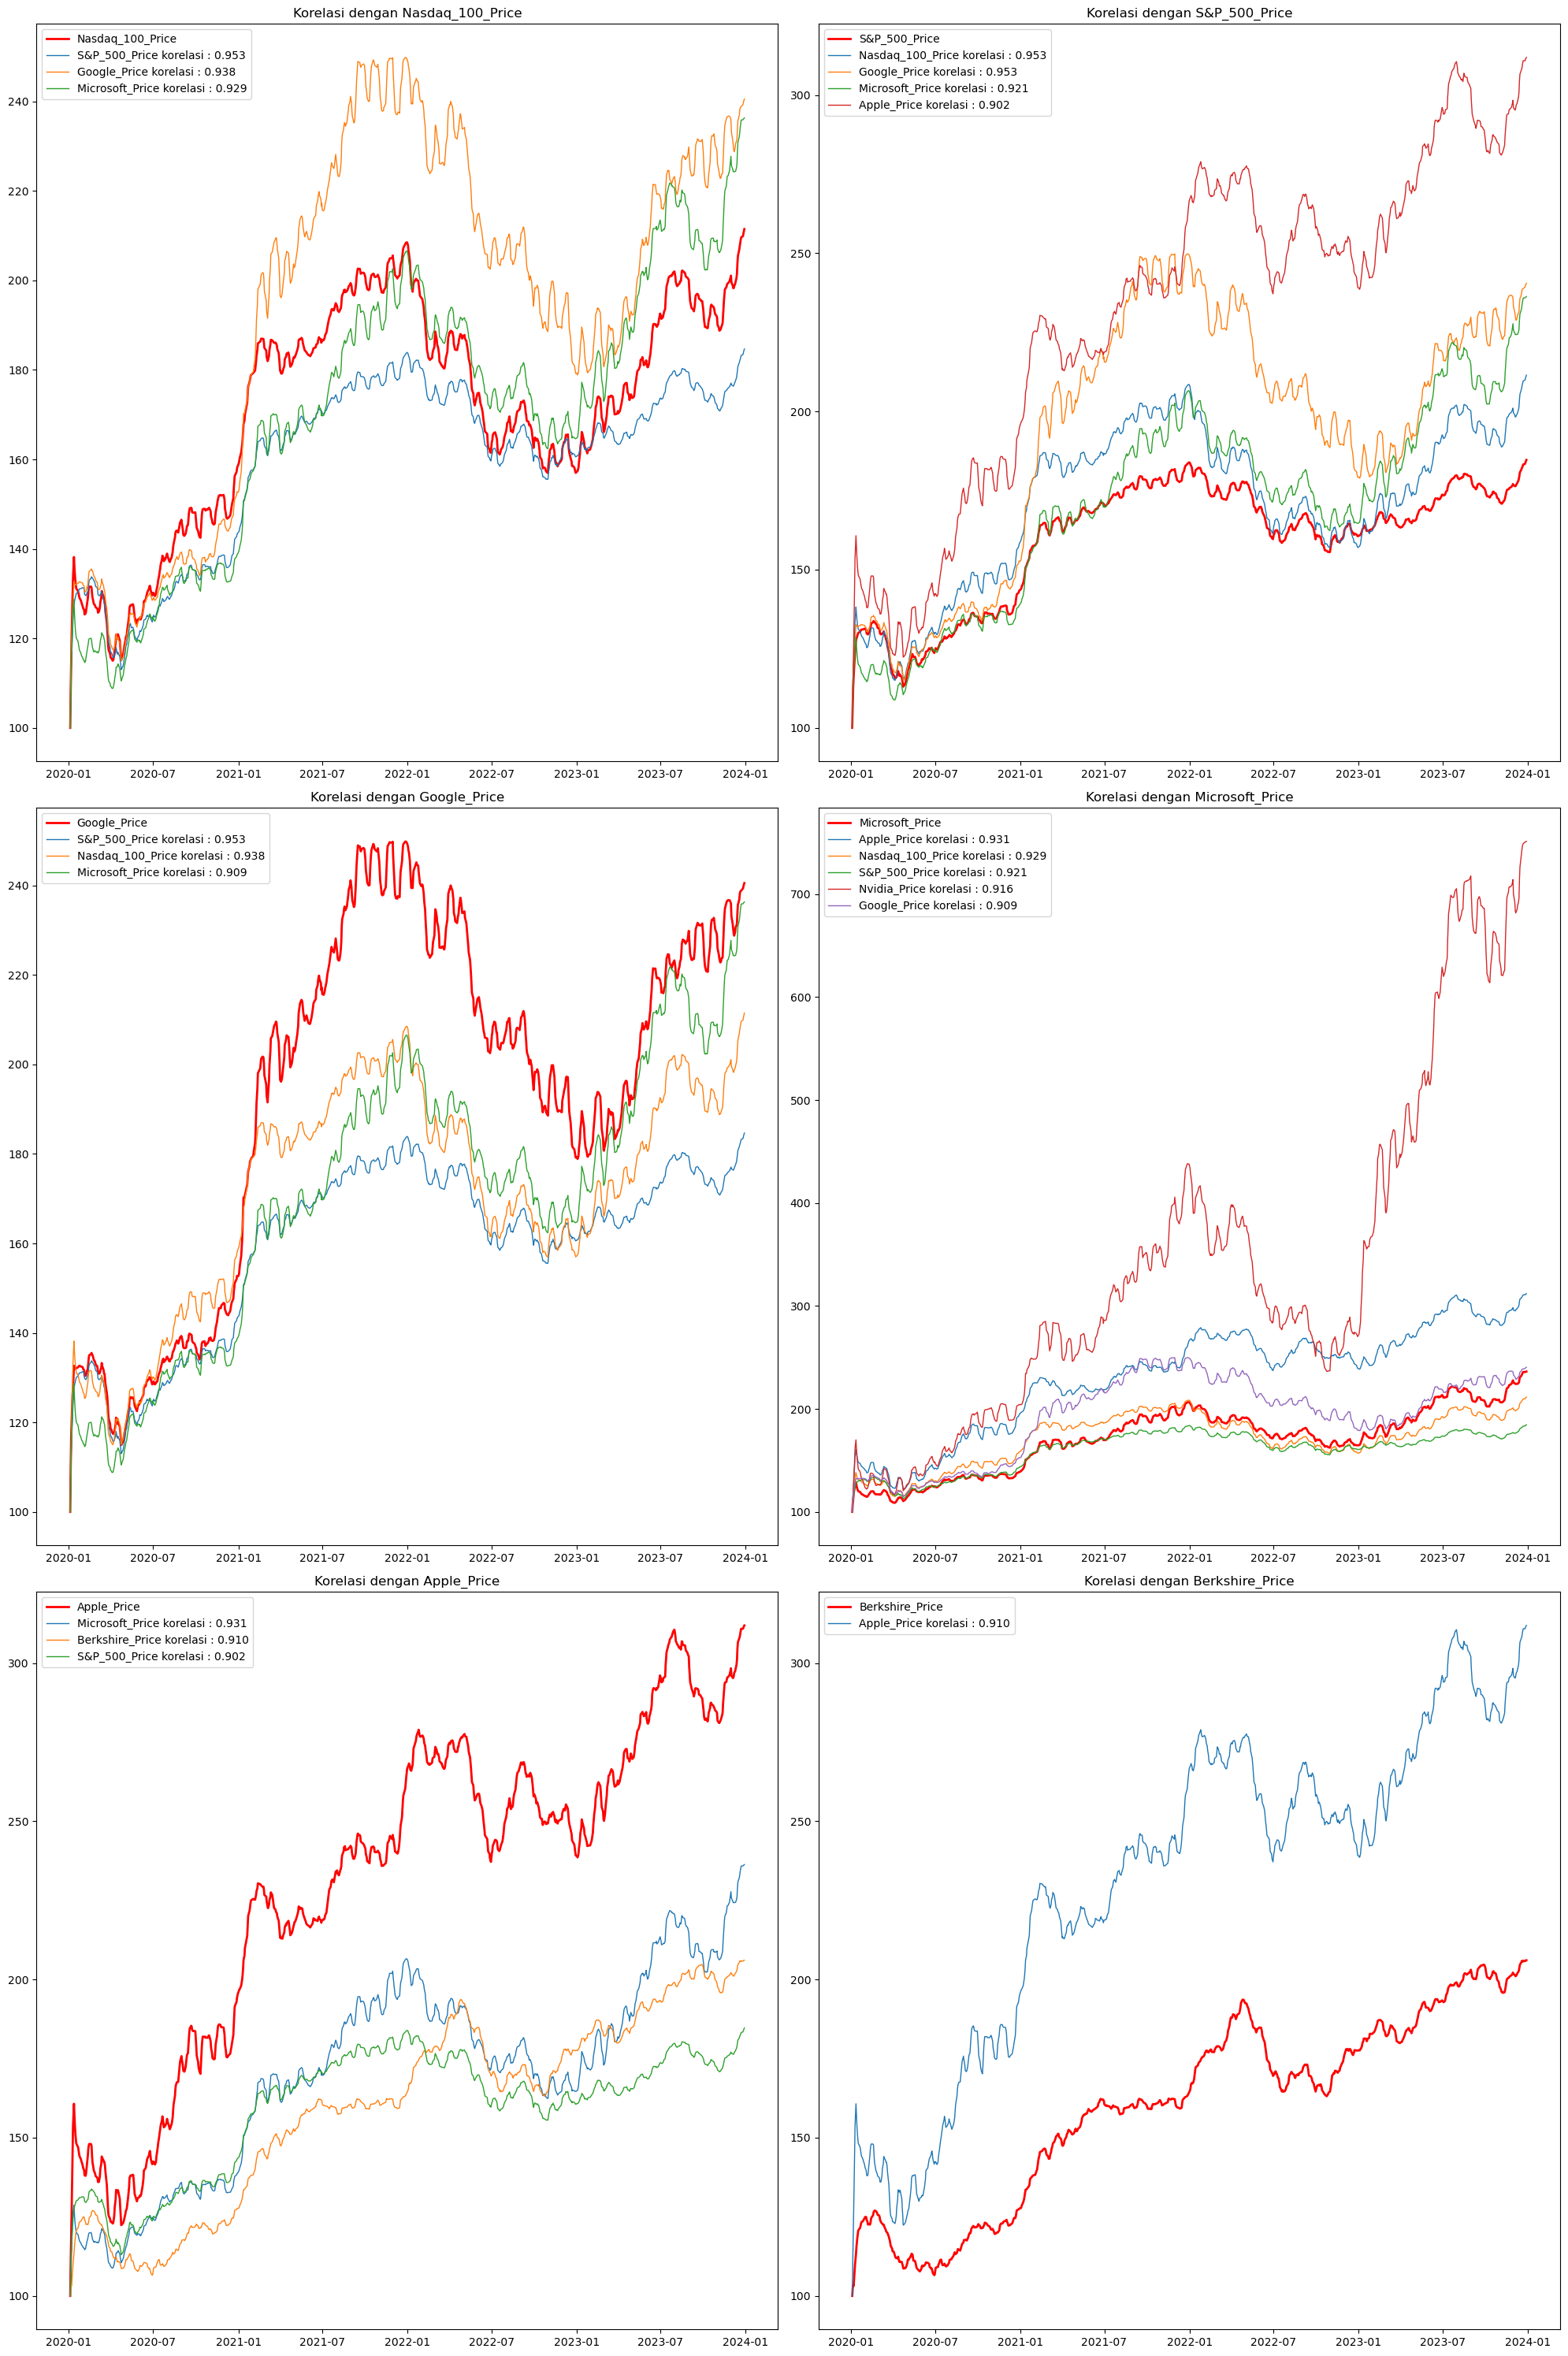

In [29]:
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2, figsize=(20,30))

plot_correlation_feature(ax1, 'Nasdaq_100_Price', corr_df, norm_df,corr=0.9)
plot_correlation_feature(ax2, 'S&P_500_Price', corr_df, norm_df,corr=0.9)
plot_correlation_feature(ax3, 'Google_Price', corr_df, norm_df,corr=0.9)
plot_correlation_feature(ax4, 'Microsoft_Price', corr_df, norm_df,corr=0.9)
plot_correlation_feature(ax5, 'Apple_Price', corr_df, norm_df,corr=0.9)
plot_correlation_feature(ax6, 'Berkshire_Price', corr_df, norm_df,corr=0.9)

plt.tight_layout()
plt.show()

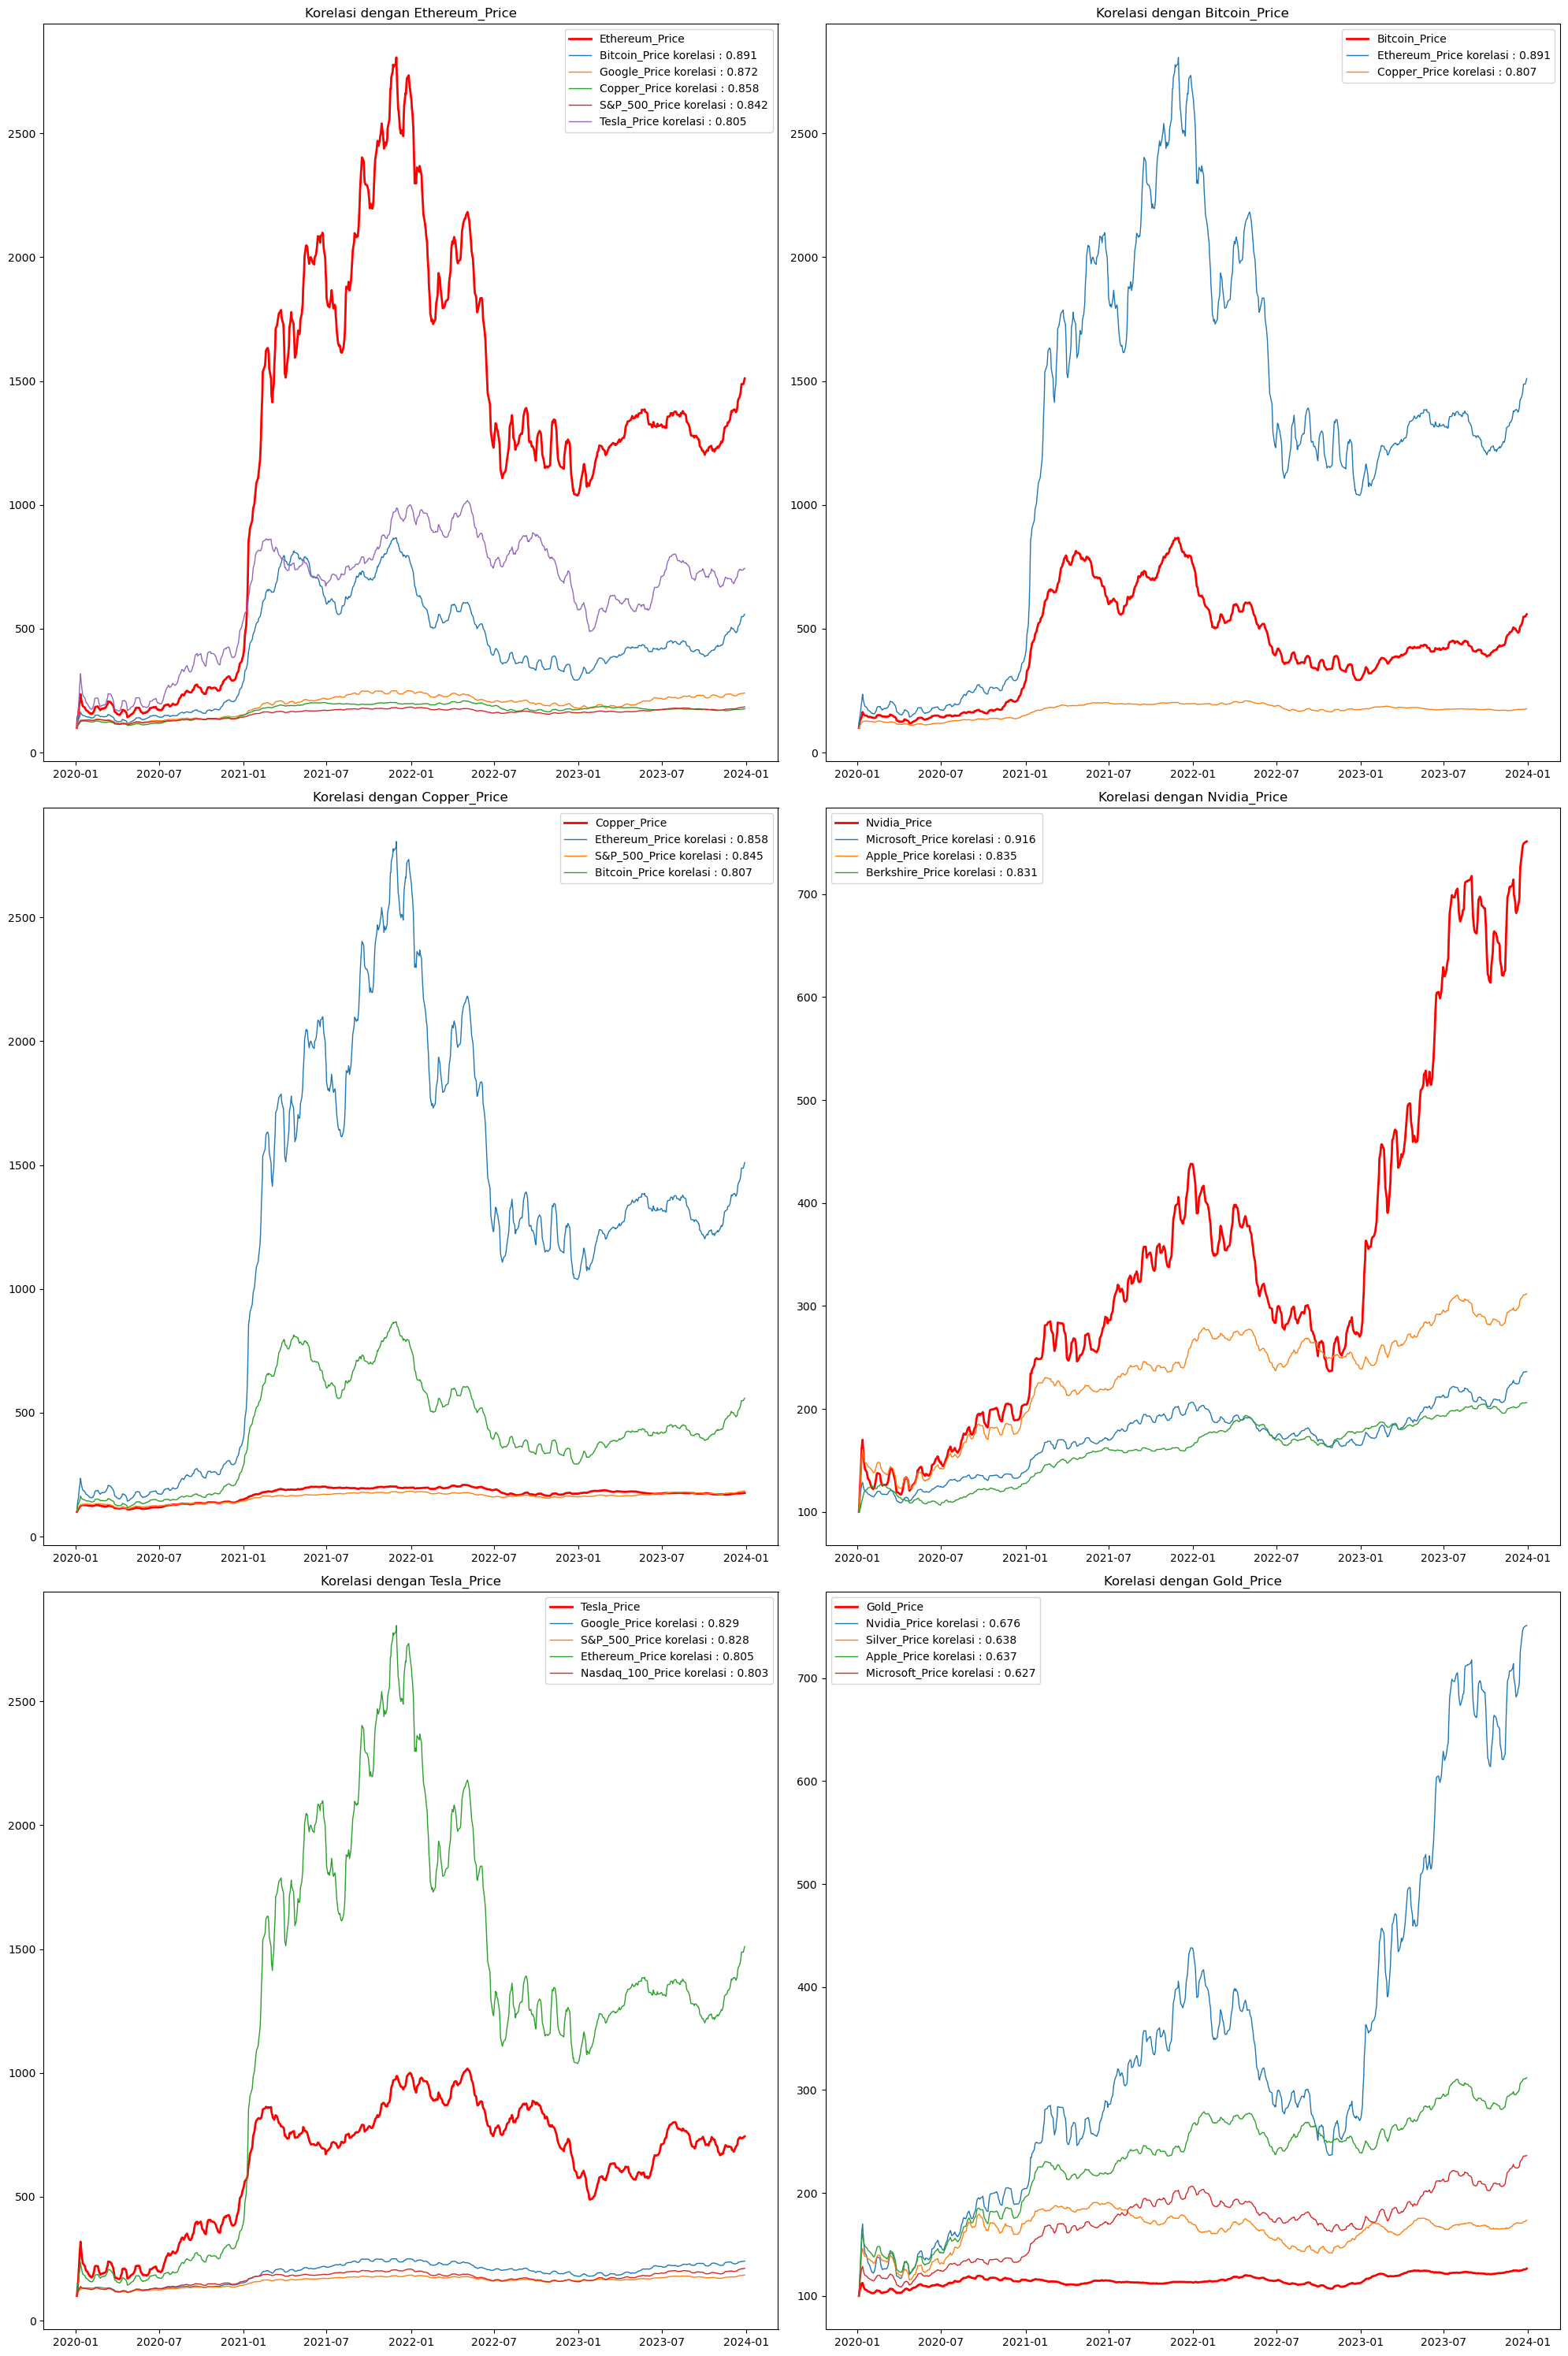

In [30]:
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2, figsize=(20,30))

plot_correlation_feature(ax1, 'Ethereum_Price', corr_df, norm_df,corr=0.8)
plot_correlation_feature(ax2, 'Bitcoin_Price', corr_df, norm_df,corr=0.8)
plot_correlation_feature(ax3, 'Copper_Price', corr_df, norm_df,corr=0.8)
plot_correlation_feature(ax4, 'Nvidia_Price', corr_df, norm_df,corr=0.8)
plot_correlation_feature(ax5, 'Tesla_Price', corr_df, norm_df,corr=0.8)
plot_correlation_feature(ax6, 'Gold_Price', corr_df, norm_df,corr=0.6)

plt.tight_layout()
plt.show()

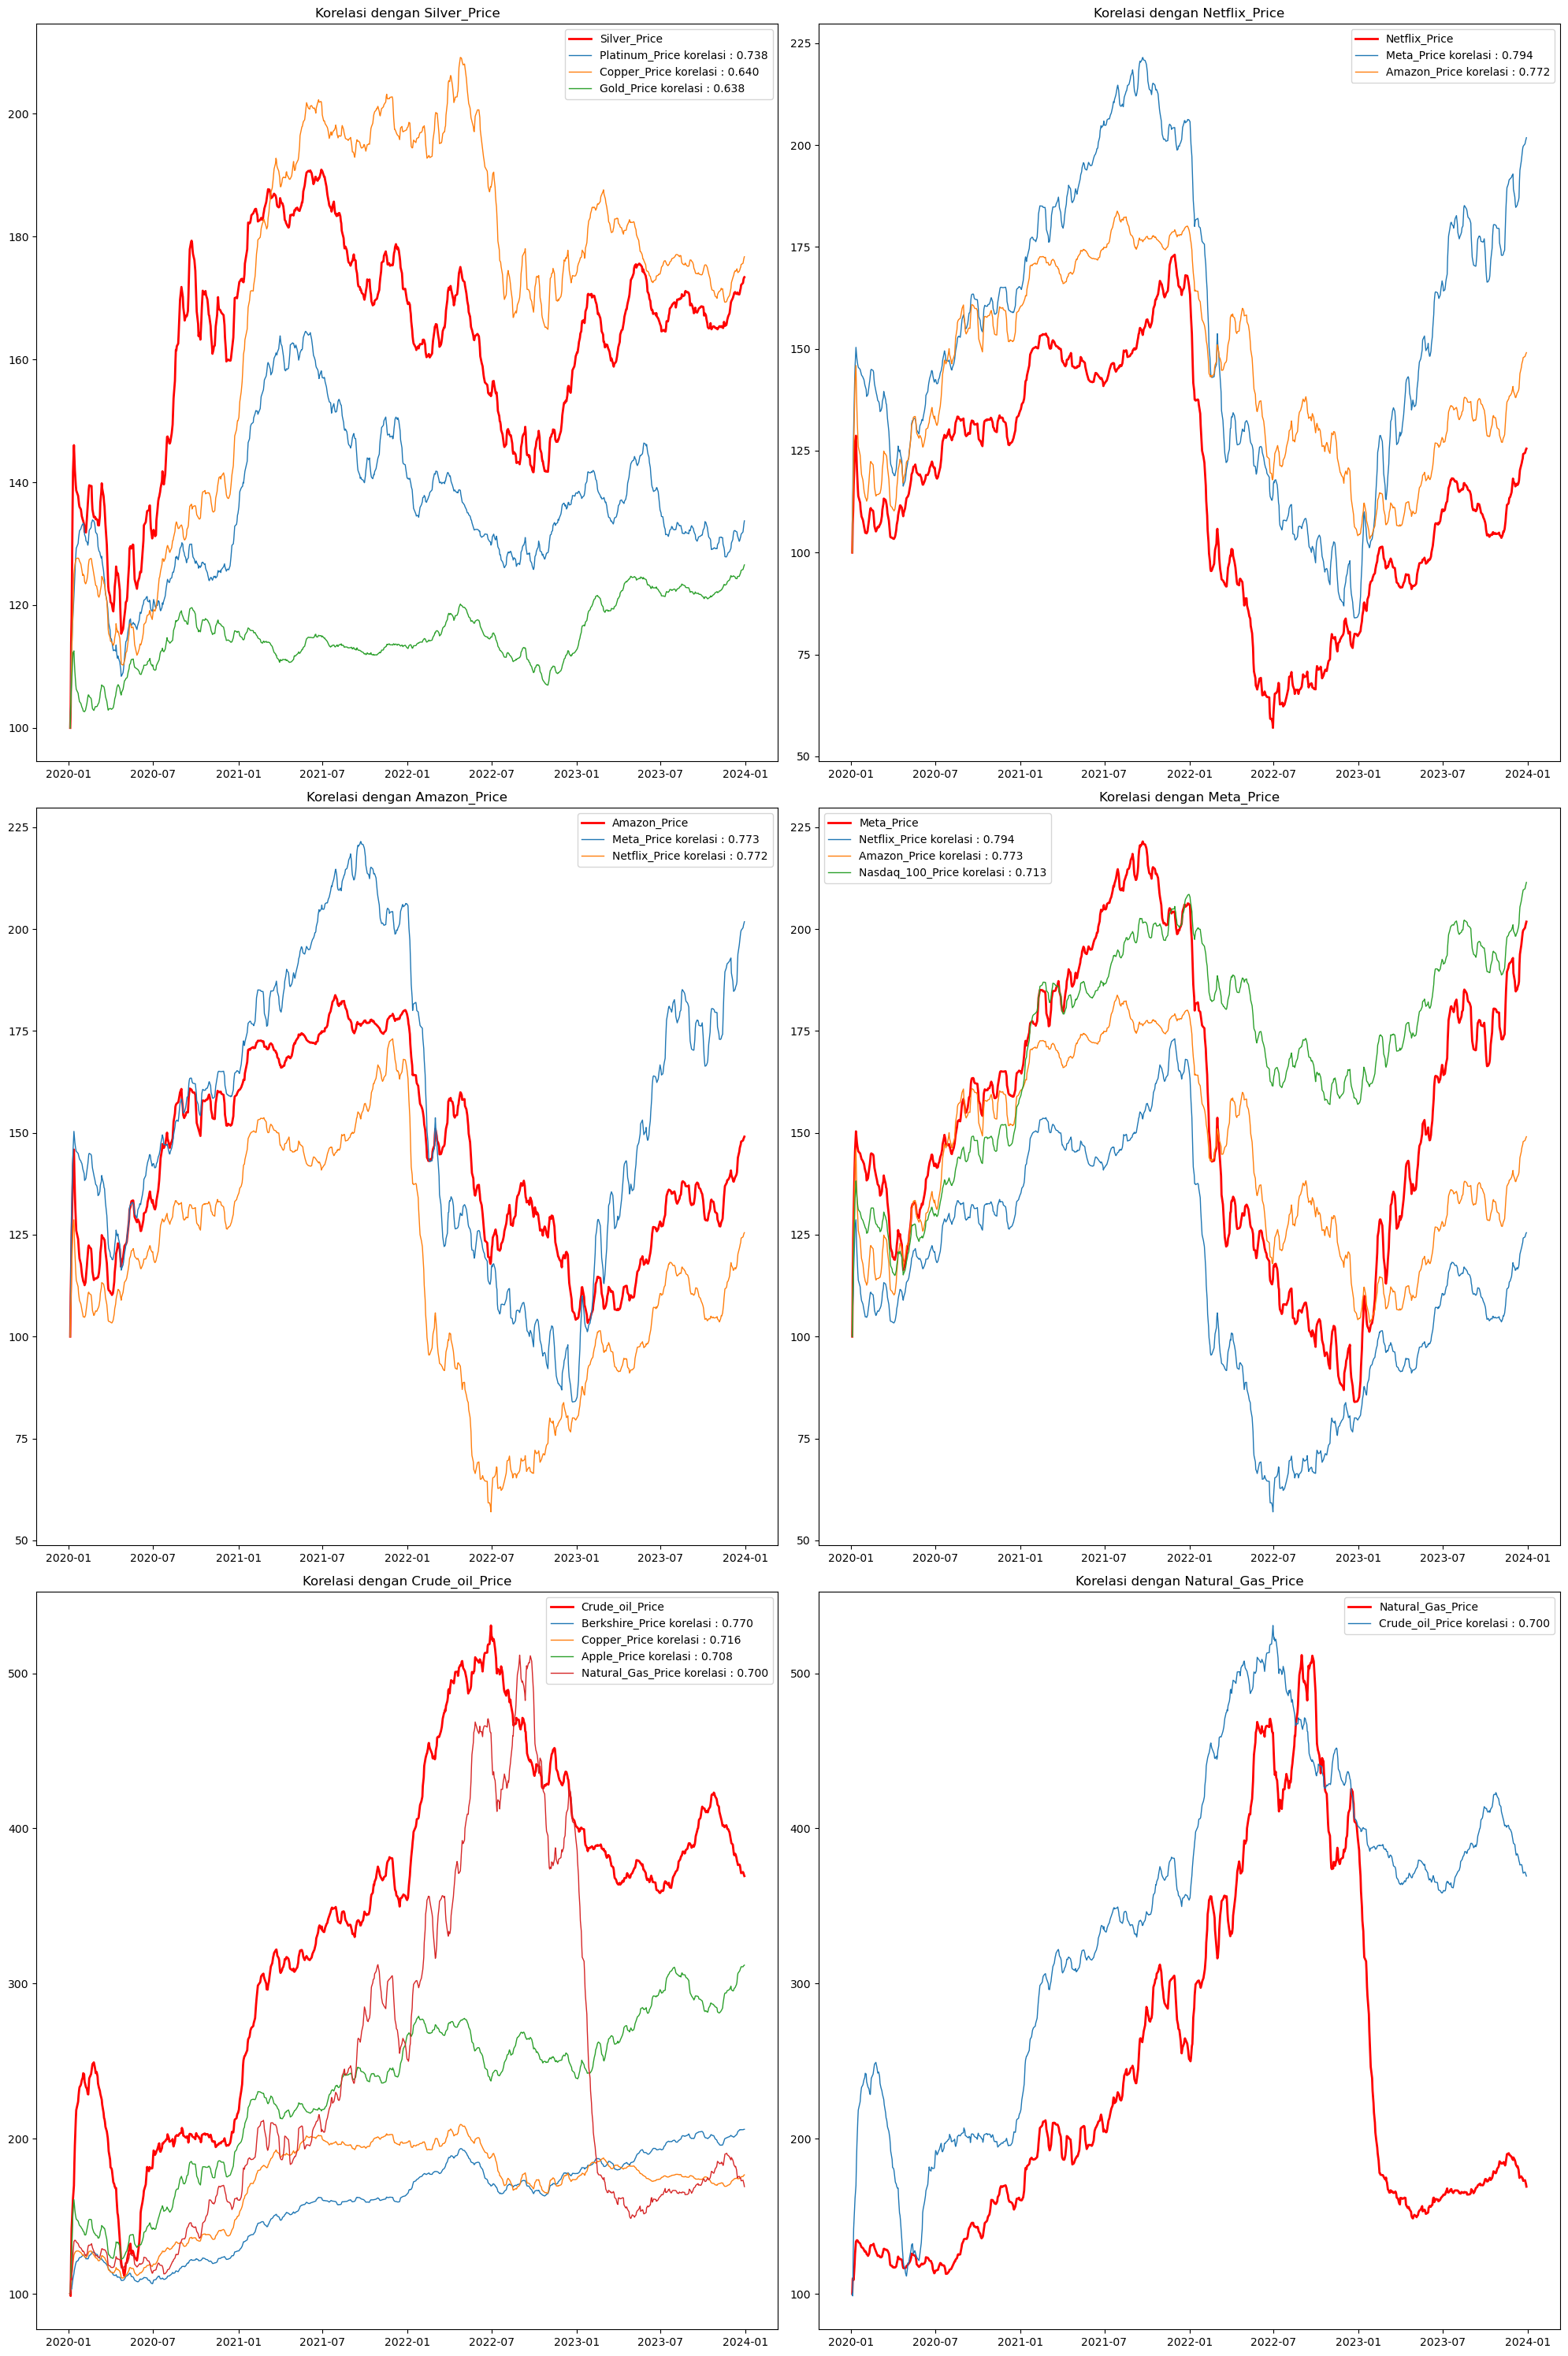

In [31]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20,30))

plot_correlation_feature(ax1, 'Silver_Price', corr_df, norm_df,corr=0.6)
plot_correlation_feature(ax2, 'Netflix_Price', corr_df, norm_df,corr=0.7)
plot_correlation_feature(ax3, 'Amazon_Price', corr_df, norm_df,corr=0.7)
plot_correlation_feature(ax4, 'Meta_Price', corr_df, norm_df,corr=0.7)
plot_correlation_feature(ax5, 'Crude_oil_Price', corr_df, norm_df,corr=0.7)
plot_correlation_feature(ax6, 'Natural_Gas_Price', corr_df, norm_df,corr=0.7)

plt.tight_layout()
plt.show()

In [32]:
asset_categories = {
    'Tech Stocks': ['Apple_Price', 'Tesla_Price', 'Microsoft_Price', 'Google_Price',
                   'Nvidia_Price', 'Netflix_Price', 'Amazon_Price', 'Meta_Price'],
    'Cryptocurrencies': ['Bitcoin_Price', 'Ethereum_Price'],
    'Commodities': ['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price',
                   'Silver_Price', 'Gold_Price', 'Platinum_Price'],
    'Market Indices': ['S&P_500_Price', 'Nasdaq_100_Price', 'Berkshire_Price']
}

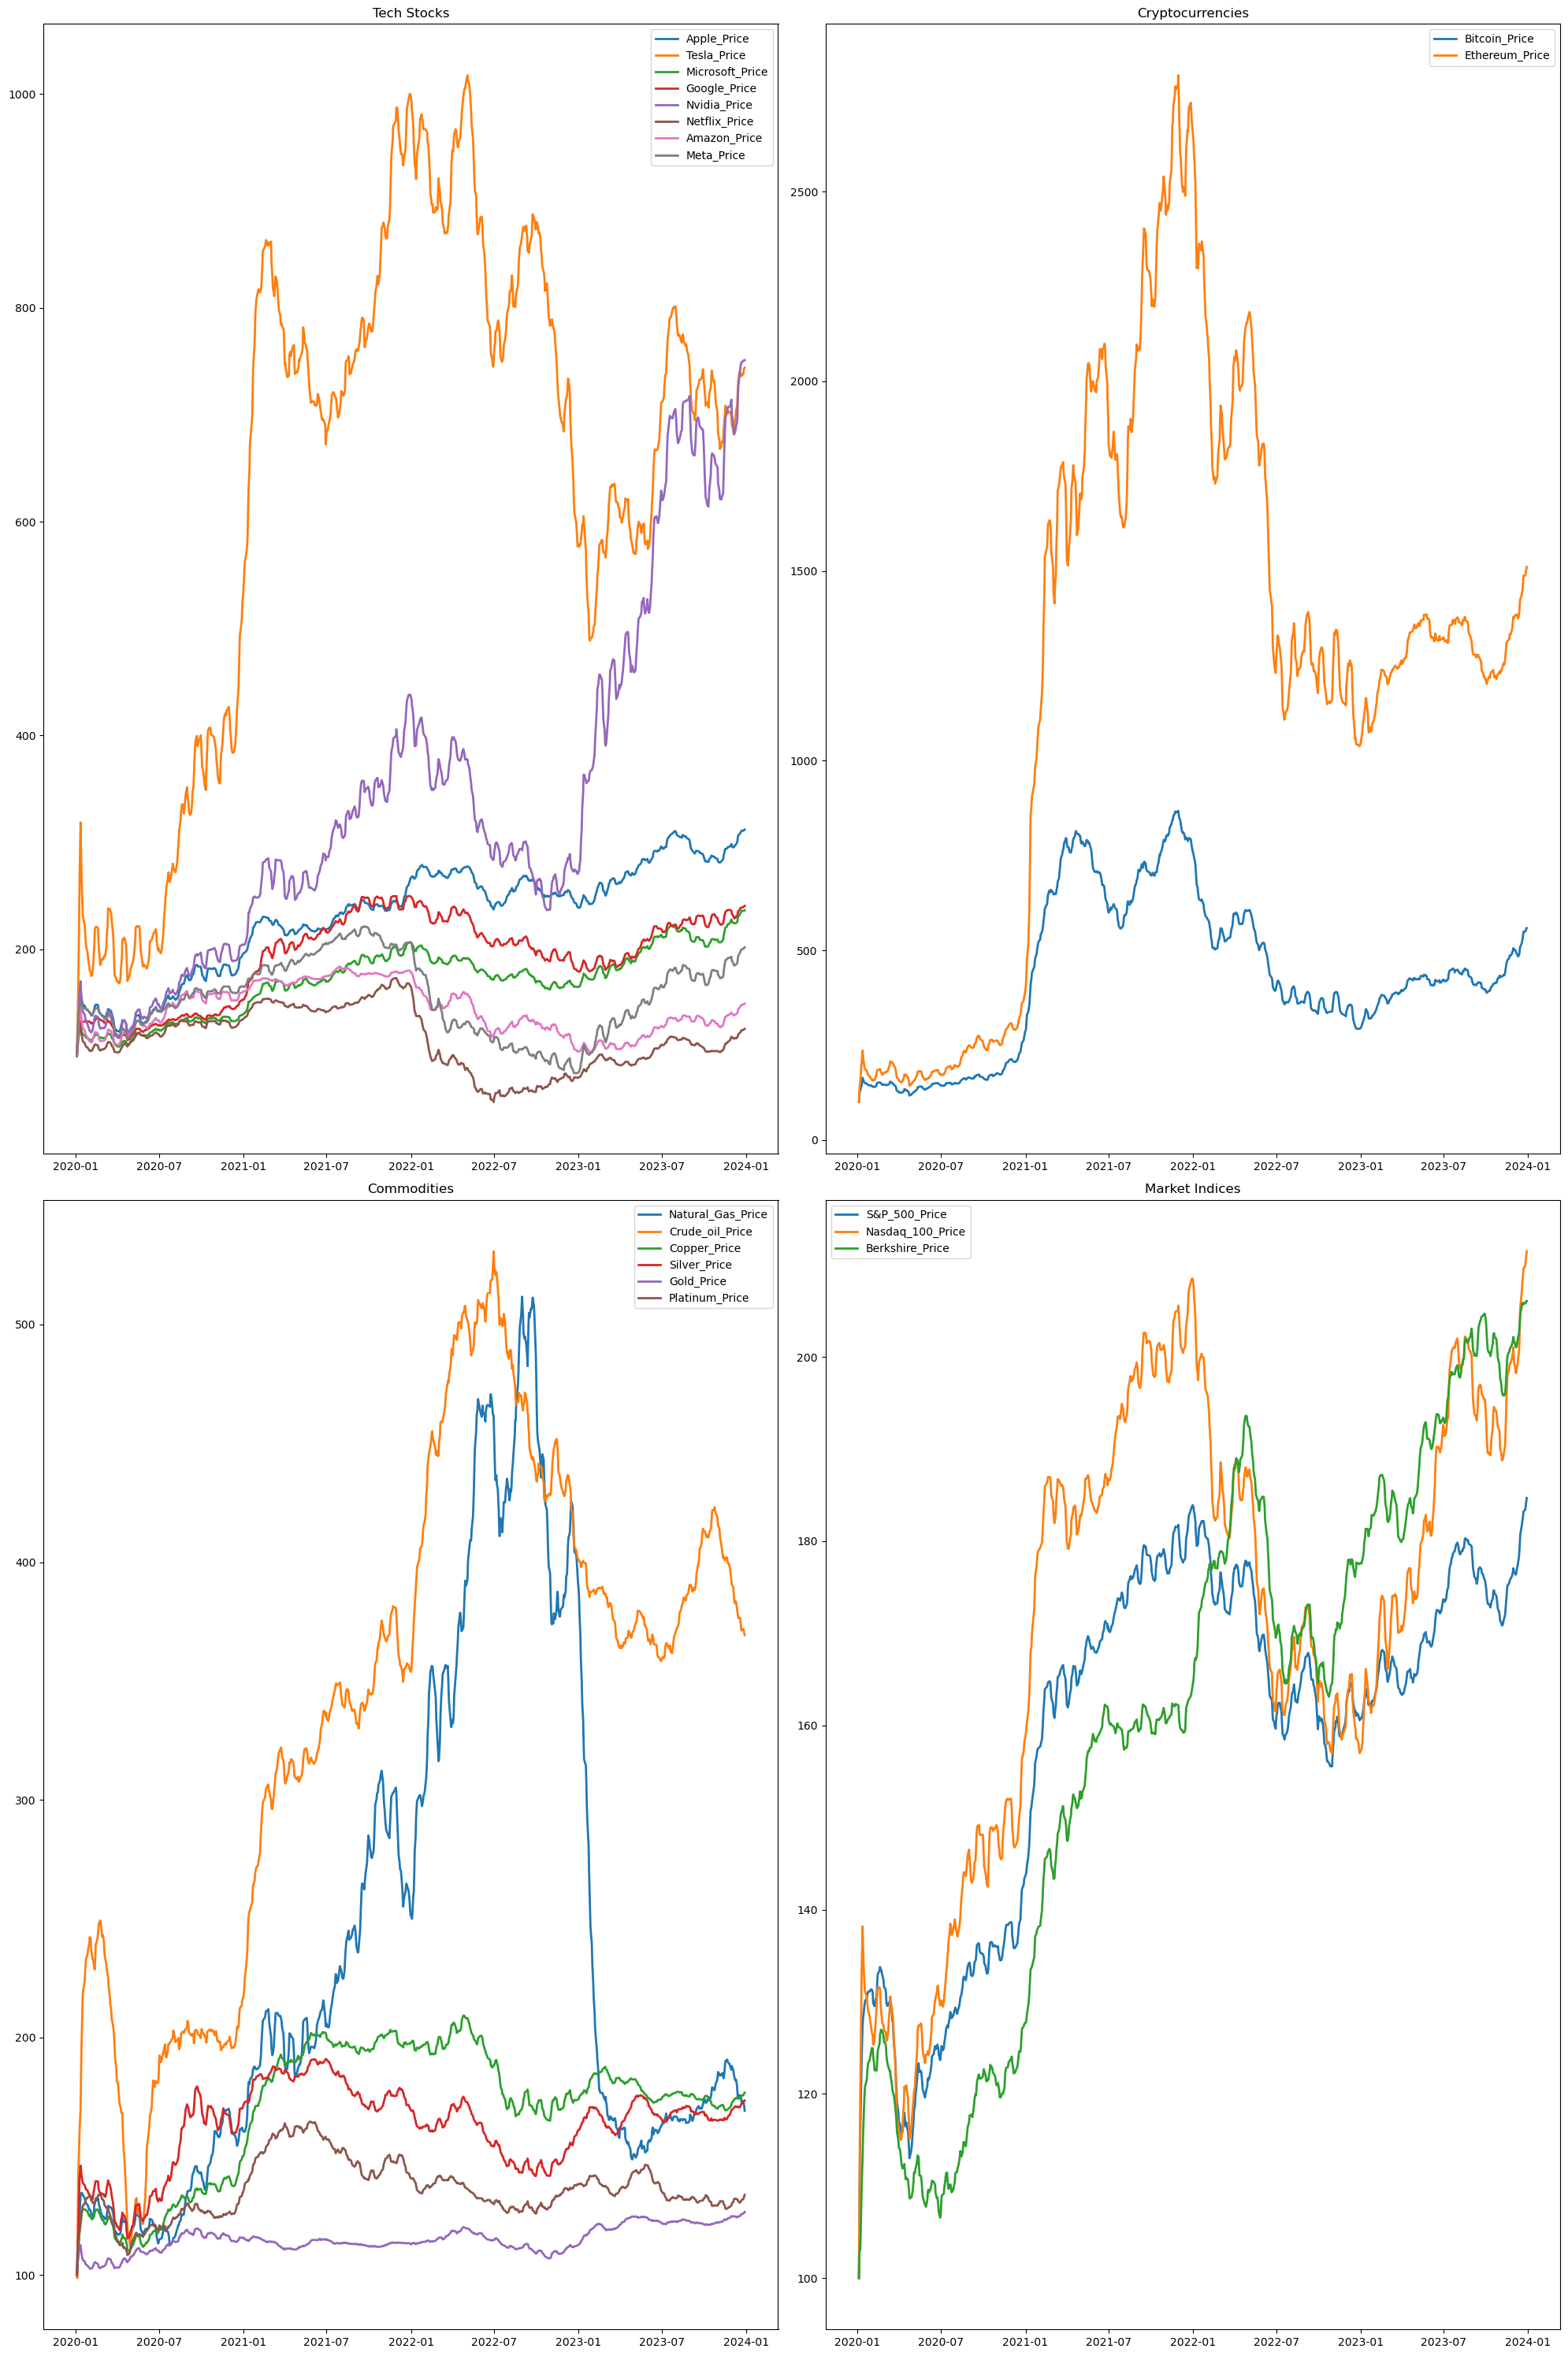

In [33]:
fig, axes = plt.subplots(2,2, figsize=(20,30))

for i, (category, assets) in enumerate(asset_categories.items()):
    ax = axes[i // 2, i % 2]

    for asset in assets:
        ax.plot(norm_df[asset], label=asset, linewidth=2)

    ax.set_title(category)
    ax.legend()

plt.tight_layout()
plt.show()

# EDA Return asset

In [34]:
price_data = df[price_columns].dropna()
returns = price_data.pct_change().dropna()
returns.sort_index(inplace=True)
returns.head()

Natural_Gas_Price  Crude_oil_Price  Copper_Price  Bitcoin_Price  \
Date                                                                          
2020-01-05           0.190926        -0.026096      0.061037       0.328854   
2020-01-06          -0.061376         0.791709      0.071799       0.155040   
2020-01-07          -0.058061         0.123589      0.103309      -0.094158   
2020-01-09           0.512268         0.073832      0.105523       0.290902   
2020-01-10           0.000000        -0.094481     -0.051944      -0.108637   

            Platinum_Price  Ethereum_Price  S&P_500_Price  Nasdaq_100_Price  \
Date                                                                          
2020-01-05        0.082742        0.562730       0.145804          0.164553   
2020-01-06        0.156306        0.169670       0.079492          0.101020   
2020-01-07       -0.070921       -0.068637       0.019678          0.070879   
2020-01-09        0.149381        1.060186       0.131838          0.195891   
2020-01-10       -0.057624       -0.257945      -0.041357         -0.057729   

            Apple_Price  Tesla_Price  Microsoft_Price  Silver_Price  \
Date                                                                  
2020-01-05     0.199900     0.456386         0.147656      0.068221   
2020-01-06     0.113325     0.280642         0.047316      0.260343   
2020-01-07     0.131370     0.246701         0.119619     -0.032347   
2020-01-09     0.474020     1.121517         0.110259      0.572346   
2020-01-10    -0.129602    -0.056584        -0.065165     -0.153290   

            Google_Price  Nvidia_Price  Berkshire_Price  Netflix_Price  \
Date                                                                     
2020-01-05      0.195463      0.163238         0.048708       0.140601   
2020-01-06      0.089115      0.245721         0.005931       0.025646   
2020-01-07      0.005018      0.082217        -0.031132       0.140214   
2020-01-09      0.147712      0.450262         0.226275       0.146014   
2020-01-10     -0.101027     -0.014905        -0.026997      -0.052179   

            Amazon_Price  Meta_Price  Gold_Price  
Date                                              
2020-01-05      0.198239    0.267356    0.068807  
2020-01-06      0.080927    0.146537    0.029043  
2020-01-07      0.165034    0.024320    0.016911  
2020-01-09      0.215506    0.243696    0.111804  
2020-01-10     -0.079447   -0.097516   -0.031634

In [35]:
returns.index.year.value_counts()

Date
2023    250
2020    248
2021    246
2022    245
Name: count, dtype: int64

In [36]:
print(returns.shape)
print(returns.info())

(989, 19)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 989 entries, 2020-01-05 to 2023-12-29
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Natural_Gas_Price  989 non-null    float64
 1   Crude_oil_Price    989 non-null    float64
 2   Copper_Price       989 non-null    float64
 3   Bitcoin_Price      989 non-null    float64
 4   Platinum_Price     989 non-null    float64
 5   Ethereum_Price     989 non-null    float64
 6   S&P_500_Price      989 non-null    float64
 7   Nasdaq_100_Price   989 non-null    float64
 8   Apple_Price        989 non-null    float64
 9   Tesla_Price        989 non-null    float64
 10  Microsoft_Price    989 non-null    float64
 11  Silver_Price       989 non-null    float64
 12  Google_Price       989 non-null    float64
 13  Nvidia_Price       989 non-null    float64
 14  Berkshire_Price    989 non-null    float64
 15  Netflix_Price      989 non-null    float64
 1

# Cummulative Analisis

In [37]:
initial_investment = 1000

df_cummulative = initial_investment * (1 + returns).cumprod()
df_cummulative.head()

Natural_Gas_Price  Crude_oil_Price  Copper_Price  Bitcoin_Price  \
Date                                                                          
2020-01-05        1190.926276       973.904481   1061.037173    1328.854410   
2020-01-06        1117.832388      1744.953225   1137.218908    1534.879867   
2020-01-07        1052.930057      1960.610537   1254.703993    1390.359268   
2020-01-09        1592.312539      2105.366814   1387.104176    1794.818106   
2020-01-10        1592.312539      1906.450025   1315.052777    1599.834300   

            Platinum_Price  Ethereum_Price  S&P_500_Price  Nasdaq_100_Price  \
Date                                                                          
2020-01-05     1082.742317     1562.730355    1145.804493       1164.552803   
2020-01-06     1251.981644     1827.878520    1236.887270       1282.195854   
2020-01-07     1163.190099     1702.417809    1261.226472       1373.076651   
2020-01-09     1336.948964     3507.297656    1427.504554       1642.049667   
2020-01-10     1259.908219     2602.609465    1368.467921       1547.255049   

            Apple_Price  Tesla_Price  Microsoft_Price  Silver_Price  \
Date                                                                  
2020-01-05  1199.900382  1456.386293      1147.656301   1068.220824   
2020-01-06  1335.879130  1865.109034      1201.959109   1346.324371   
2020-01-07  1511.373070  2325.233645      1345.736638   1302.774600   
2020-01-09  2227.793458  4933.021807      1494.116100   2048.412471   
2020-01-10  1939.066910  4653.894081      1396.752350   1734.410755   

            Google_Price  Nvidia_Price  Berkshire_Price  Netflix_Price  \
Date                                                                     
2020-01-05   1195.462795   1163.238440      1048.708134    1140.600967   
2020-01-06   1301.996370   1449.070265      1054.928230    1169.852780   
2020-01-07   1308.529946   1568.207997      1022.086124    1333.882663   
2020-01-09   1501.814882   2274.312983      1253.358852    1528.647550   
2020-01-10   1350.090744   2240.414678      1219.521531    1448.884860   

            Amazon_Price   Meta_Price   Gold_Price  
Date                                                
2020-01-05   1198.238809  1267.355890  1068.807339  
2020-01-06   1295.209141  1453.070175  1099.849189  
2020-01-07   1508.963204  1488.408521  1118.449164  
2020-01-09   1834.154524  1851.127820  1243.496293  
2020-01-10   1688.436943  1670.614035  1204.159859

In [38]:
df_cummulative.columns

Index(['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Bitcoin_Price',
       'Platinum_Price', 'Ethereum_Price', 'S&P_500_Price', 'Nasdaq_100_Price',
       'Apple_Price', 'Tesla_Price', 'Microsoft_Price', 'Silver_Price',
       'Google_Price', 'Nvidia_Price', 'Berkshire_Price', 'Netflix_Price',
       'Amazon_Price', 'Meta_Price', 'Gold_Price'],
      dtype='object')

In [39]:
for col in df_cummulative.columns:
  df_cummulative[col] = df_cummulative[col].rolling(window=30, min_periods=1).mean()

In [40]:
asset_cummulative = {
    'Cryptocurrencies': ['Bitcoin_Price', 'Ethereum_Price'],
    'Traditional_asset': ['S&P_500_Price', 'Gold_Price'],
    'Tech_stocks': ['Apple_Price', 'Tesla_Price', 'Microsoft_Price', 'Google_Price', 'Nvidia_Price', 'Netflix_Price', 'Amazon_Price', 'Meta_Price'],
    'Commodities': ['Natural_Gas_Price', 'Crude_oil_Price']
}

# Return Analisis

In [41]:
returns.head()

Natural_Gas_Price  Crude_oil_Price  Copper_Price  Bitcoin_Price  \
Date                                                                          
2020-01-05           0.190926        -0.026096      0.061037       0.328854   
2020-01-06          -0.061376         0.791709      0.071799       0.155040   
2020-01-07          -0.058061         0.123589      0.103309      -0.094158   
2020-01-09           0.512268         0.073832      0.105523       0.290902   
2020-01-10           0.000000        -0.094481     -0.051944      -0.108637   

            Platinum_Price  Ethereum_Price  S&P_500_Price  Nasdaq_100_Price  \
Date                                                                          
2020-01-05        0.082742        0.562730       0.145804          0.164553   
2020-01-06        0.156306        0.169670       0.079492          0.101020   
2020-01-07       -0.070921       -0.068637       0.019678          0.070879   
2020-01-09        0.149381        1.060186       0.131838          0.195891   
2020-01-10       -0.057624       -0.257945      -0.041357         -0.057729   

            Apple_Price  Tesla_Price  Microsoft_Price  Silver_Price  \
Date                                                                  
2020-01-05     0.199900     0.456386         0.147656      0.068221   
2020-01-06     0.113325     0.280642         0.047316      0.260343   
2020-01-07     0.131370     0.246701         0.119619     -0.032347   
2020-01-09     0.474020     1.121517         0.110259      0.572346   
2020-01-10    -0.129602    -0.056584        -0.065165     -0.153290   

            Google_Price  Nvidia_Price  Berkshire_Price  Netflix_Price  \
Date                                                                     
2020-01-05      0.195463      0.163238         0.048708       0.140601   
2020-01-06      0.089115      0.245721         0.005931       0.025646   
2020-01-07      0.005018      0.082217        -0.031132       0.140214   
2020-01-09      0.147712      0.450262         0.226275       0.146014   
2020-01-10     -0.101027     -0.014905        -0.026997      -0.052179   

            Amazon_Price  Meta_Price  Gold_Price  
Date                                              
2020-01-05      0.198239    0.267356    0.068807  
2020-01-06      0.080927    0.146537    0.029043  
2020-01-07      0.165034    0.024320    0.016911  
2020-01-09      0.215506    0.243696    0.111804  
2020-01-10     -0.079447   -0.097516   -0.031634

In [42]:
return_stats = pd.DataFrame({
    'Mean_daily_return': returns.mean(),
    'Std_daily_return': returns.std(),
    'Min_daily_return': returns.min(),
    'Max_daily_return': returns.max(),
    'Annualized_return': (returns.mean() * 252),
    'Annualized_volality': (returns.std() * np.sqrt(252))
})
return_stats.sort_values('Annualized_return', ascending=False)

Mean_daily_return  Std_daily_return  Min_daily_return  \
Ethereum_Price              0.035412          0.268195         -0.782597   
Tesla_Price                 0.027158          0.219067         -0.820490   
Bitcoin_Price               0.021935          0.213362         -0.712643   
Nvidia_Price                0.020236          0.185523         -0.683355   
Meta_Price                  0.015434          0.196314         -0.582118   
Natural_Gas_Price           0.013948          0.162814         -0.563195   
Netflix_Price               0.012267          0.174282         -0.521925   
Crude_oil_Price             0.007157          0.182487         -3.059661   
Amazon_Price                0.007083          0.116459         -0.449145   
Google_Price                0.005466          0.094204         -0.406890   
Apple_Price                 0.005396          0.090748         -0.441227   
Microsoft_Price             0.004513          0.082940         -0.370537   
Silver_Price                0.004406          0.091642         -0.399263   
Nasdaq_100_Price            0.003721          0.075735         -0.358693   
Platinum_Price              0.002787          0.070525         -0.299238   
Copper_Price                0.002691          0.064444         -0.343226   
Berkshire_Price             0.002213          0.054391         -0.205989   
S&P_500_Price               0.002079          0.052919         -0.265963   
Gold_Price                  0.001047          0.039593         -0.214445   

                   Max_daily_return  Annualized_return  Annualized_volality  
Ethereum_Price             1.988925           8.923916             4.257459  
Tesla_Price                1.121517           6.843880             3.477577  
Bitcoin_Price              1.557752           5.527579             3.387011  
Nvidia_Price               1.257188           5.099460             2.945081  
Meta_Price                 2.589201           3.889274             3.116382  
Natural_Gas_Price          0.882671           3.514929             2.584599  
Netflix_Price              2.094070           3.091304             2.766647  
Crude_oil_Price            1.693737           1.803670             2.896890  
Amazon_Price               0.711311           1.784984             1.848728  
Google_Price               0.509649           1.377355             1.495443  
Apple_Price                0.515434           1.359787             1.440584  
Microsoft_Price            0.356912           1.137229             1.316633  
Silver_Price               0.891442           1.110388             1.454778  
Nasdaq_100_Price           0.423217           0.937705             1.202252  
Platinum_Price             0.350535           0.702207             1.119547  
Copper_Price               0.323869           0.678058             1.023023  
Berkshire_Price            0.267868           0.557691             0.863427  
S&P_500_Price              0.302506           0.523838             0.840068  
Gold_Price                 0.225585           0.263878             0.628515

In [43]:
def return_year(tahun):
  year_stat = returns[returns.index.year == tahun]

  return_stats = pd.DataFrame({
    'Mean_daily_return': year_stat.mean(),
    'Std_daily_return': year_stat.std(),
    'Min_daily_return': year_stat.min(),
    'Max_daily_return': year_stat.max(),
    'Annualized_return': (year_stat.mean() * 252),
    'Annualized_volality': (year_stat.std() * np.sqrt(252)),
    'Januari_return': year_stat[year_stat.index.month == 1].mean(),
    'Februari_return': year_stat[year_stat.index.month == 2].mean(),
    'Maret_return': year_stat[year_stat.index.month == 3].mean(),
    'April_return': year_stat[year_stat.index.month == 4].mean(),
    'Mei_return': year_stat[year_stat.index.month == 5].mean(),
    'Juni_return': year_stat[year_stat.index.month == 6].mean(),
    'Juli_return': year_stat[year_stat.index.month == 7].mean(),
    'Agustus_return': year_stat[year_stat.index.month == 8].mean(),
    'September_return': year_stat[year_stat.index.month == 9].mean(),
    'Oktober_return': year_stat[year_stat.index.month == 10].mean(),
    'November_return': year_stat[year_stat.index.month == 11].mean(),
    'Desember_return': year_stat[year_stat.index.month == 12].mean()
  })
  return return_stats.sort_values('Annualized_return', ascending=False)

In [44]:
def return_month(bulan, tahun):
  year_return = return_year(tahun)
  bulan = year_return[bulan].sort_values(ascending=False)

  plt.figure(figsize=(20, 8))
  plt.bar(range(len(bulan)), bulan.values)

  for i, value in enumerate(bulan.values):
    plt.text(i, value, f'{value:.1%}', ha='center', va='bottom', fontsize=8)

  plt.title(f"Return {bulan.name} tahun {tahun}")
  plt.xticks(range(len(bulan)), bulan.index, rotation=30)
  plt.xlabel('Month')
  plt.ylabel('Return')
  plt.show()

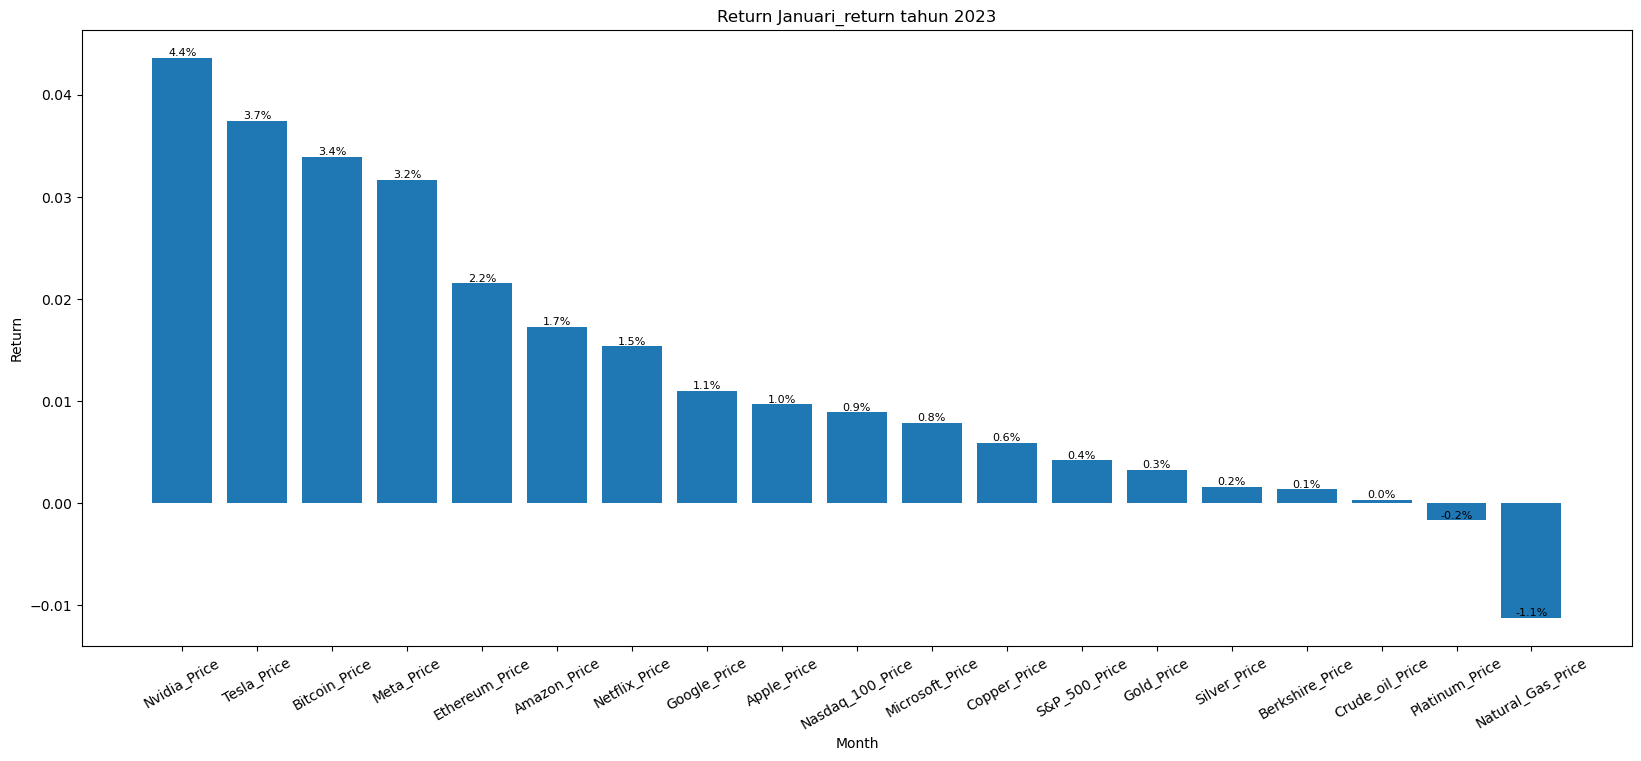

In [45]:
return_month('Januari_return', 2023)

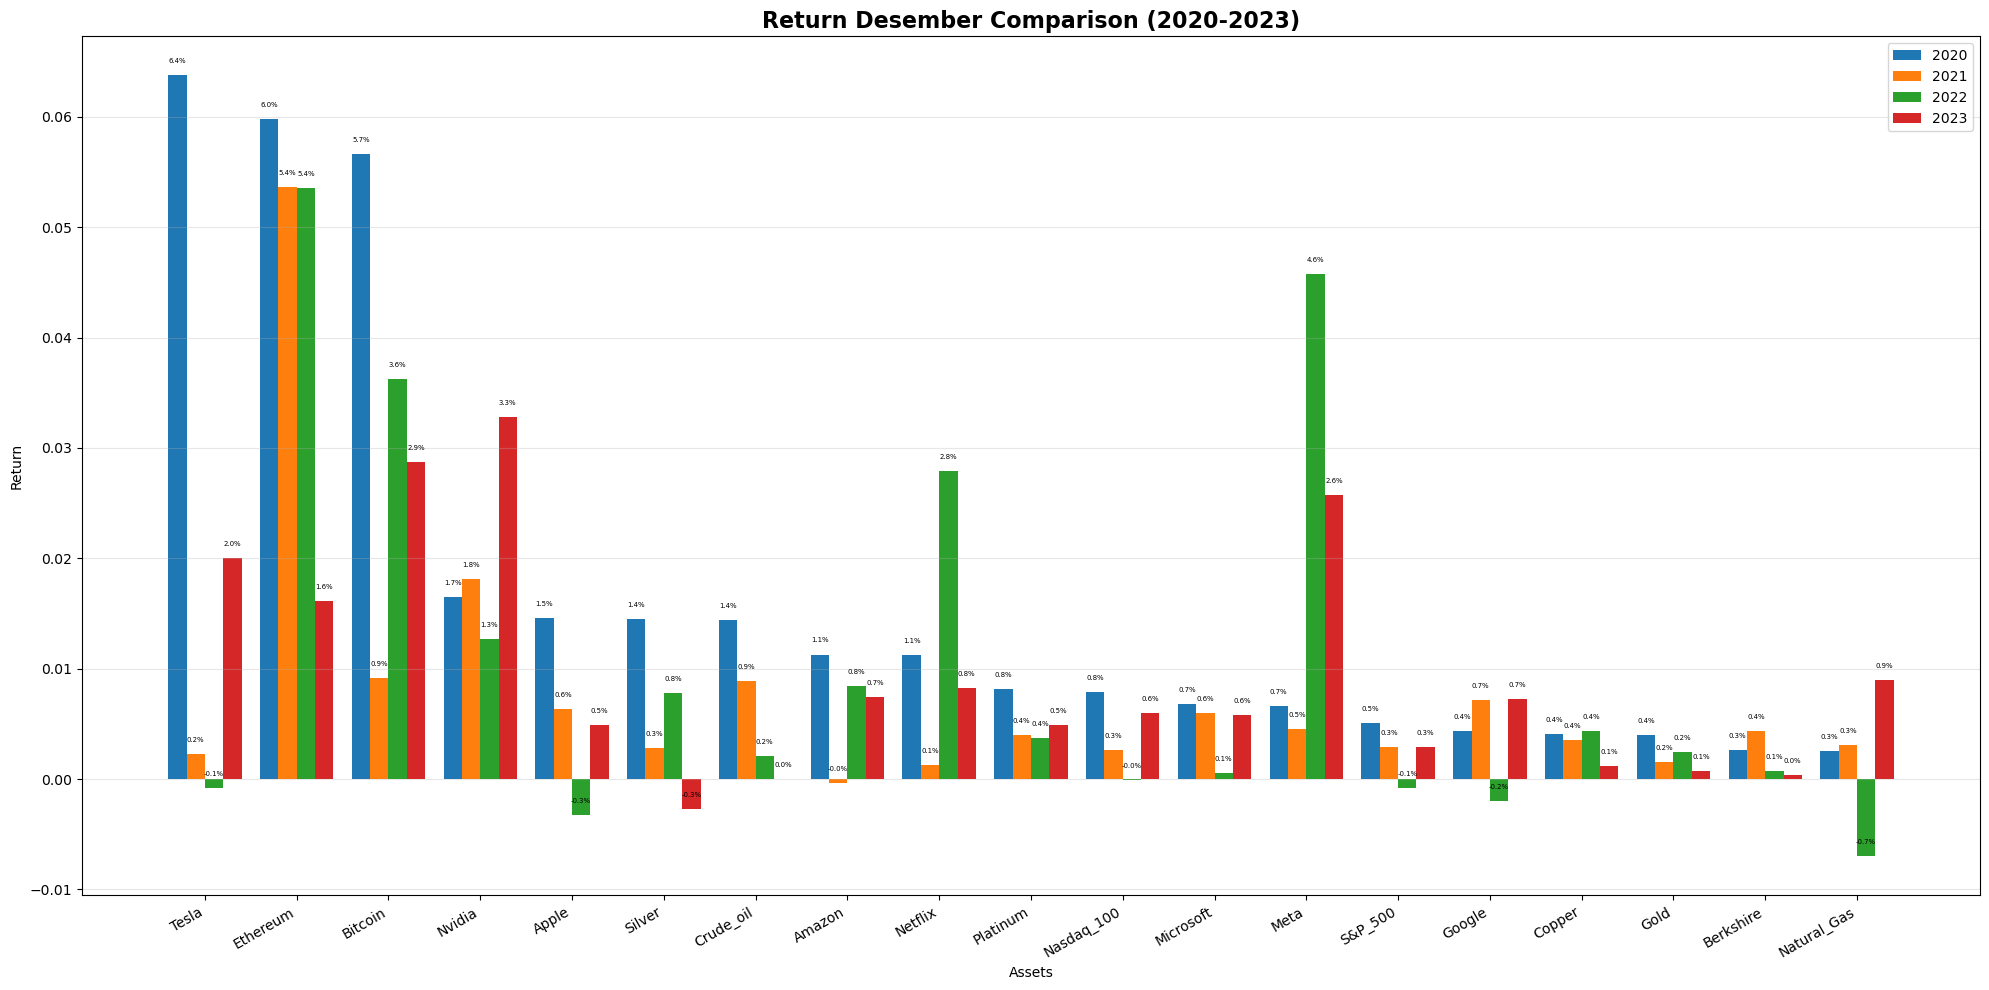

In [46]:
data = {}
bulan = 'Desember_return'
years = [2020, 2021, 2022, 2023]
for year in years:
  data_year = return_year(year)
  data[year] = data_year[bulan].sort_values(ascending=False)

assets = data[years[0]].index

x = np.arange(len(assets))
width = 0.2

plt.figure(figsize=(20, 10))

for i, year in enumerate(years):
  offset = (i - len(years)/2 + 0.5) * width
  values = [data[year][asset] for asset in assets]

  bars = plt.bar(x + offset, values, width, label=f'{year}')

  for j, value in enumerate(values):
    plt.text(x[j] + offset, value + 0.001, f'{value:.1%}', ha='center', va='bottom', fontsize=5)

plt.title(f"Return {bulan.replace('_return', '')} Comparison (2020-2023)", fontsize=16, fontweight='bold')
plt.xticks(x, [asset.replace('_Price', '') for asset in assets], rotation=30, ha='right')
plt.xlabel('Assets')
plt.ylabel('Return')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [47]:
def compare_year_return(month, assets):
  selected_assets = assets
  years = [2020, 2021, 2022, 2023]

  data = {}
  for asset in selected_assets:
    data[asset] = [return_year(year).loc[asset, month] for year in years]

  x = np.arange(len(years))
  width = 0.2

  fig, ax = plt.subplots(figsize=(20, 8))
  for i, (asset, value) in enumerate(data.items()):
    bars = ax.bar(x + i * width, value, width, label=asset.replace('_Price', ''))
    for bar, value in zip(bars, value):
      height = bar.get_height()
      ax.text(bar.get_x() + bar.get_width()/2, height, f'{value:.1%}', ha='center', va='bottom', fontsize=8)

  ax.set_title(f"Return Comparation Bulan {month.replace('_return', ' ')}")
  ax.set_xticks(x + width * (len(selected_assets) - 1) / 2)
  ax.set_xticklabels(years)
  ax.set_xlabel('Year')
  ax.set_ylabel('Return')
  ax.legend()
  plt.show()

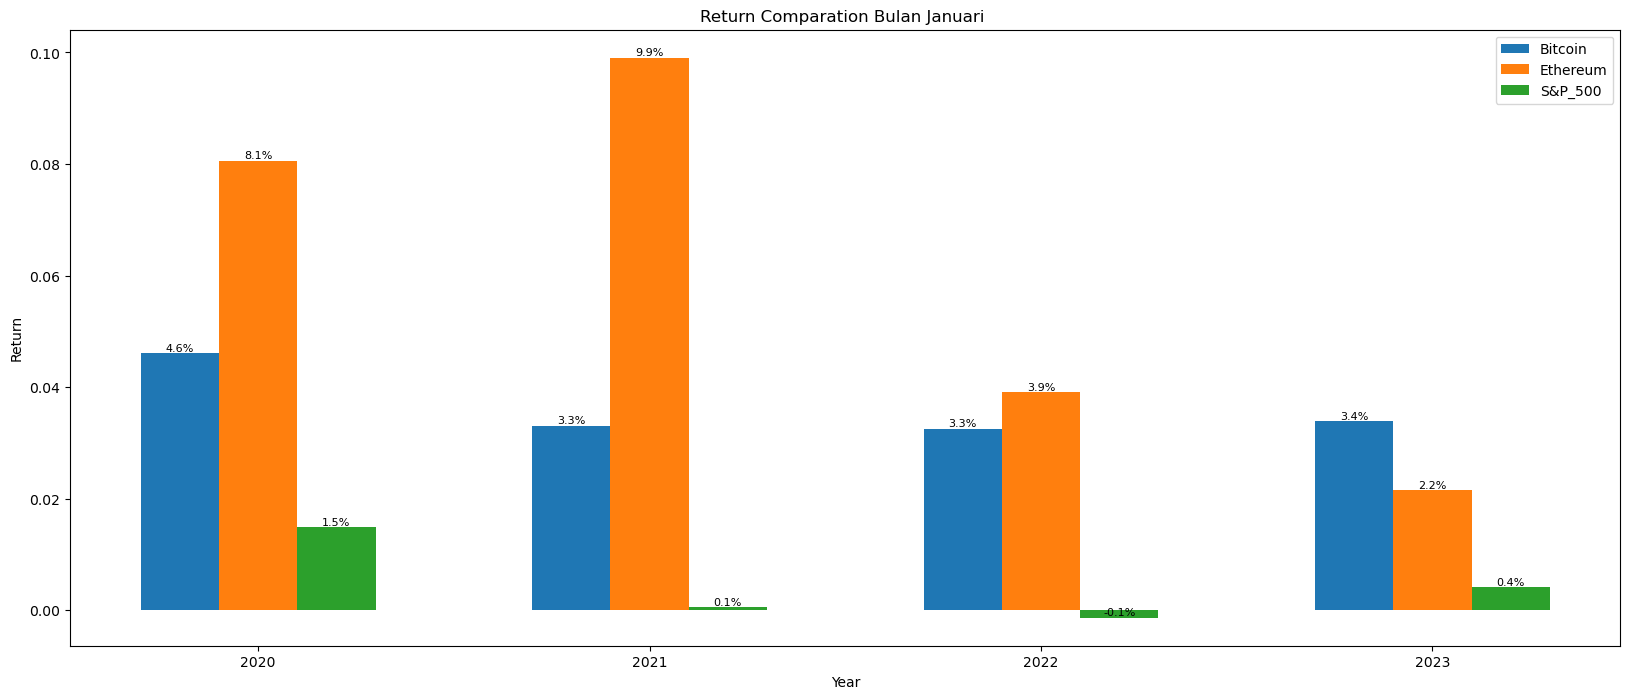

In [48]:
compare_year_return('Januari_return', ['Bitcoin_Price', 'Ethereum_Price', 'S&P_500_Price'])

# Portofolio analisis

In [49]:
tahun = 2020
assets_pilihan = ['Bitcoin_Price', 'Tesla_Price', 'Apple_Price', 'Ethereum_Price']
jumlah_investasi = 1200

year_data = return_year(tahun)

returns_analisis = year_data.loc[assets_pilihan, ['Annualized_return']].copy()
returns_analisis = returns_analisis.sort_values('Annualized_return',ascending=False)
returns_analisis.reset_index(inplace=True)
returns_analisis.columns = ['Asset', 'Annualized_return']

positive_returns = returns_analisis[returns_analisis['Annualized_return'] > 0]

total_returns = positive_returns['Annualized_return'].sum()

positive_returns['Allocation_Pct'] = positive_returns['Annualized_return'] / total_returns
positive_returns['Allocation_USD'] = positive_returns['Allocation_Pct'] * jumlah_investasi
positive_returns['Expect_return'] = positive_returns['Allocation_USD'] * positive_returns['Annualized_return']
positive_returns['Profit'] = positive_returns['Expect_return'] - jumlah_investasi


In [50]:
positive_returns

Asset  Annualized_return  Allocation_Pct  Allocation_USD  \
0     Tesla_Price          16.507005        0.420377      504.452655   
1  Ethereum_Price          12.542714        0.319420      383.304267   
2   Bitcoin_Price           7.218114        0.183821      220.584933   
3     Apple_Price           2.999293        0.076382       91.658145   

   Expect_return       Profit  
0    8327.002652  7127.002652  
1    4807.675943  3607.675943  
2    1592.207151   392.207151  
3     274.909664  -925.090336

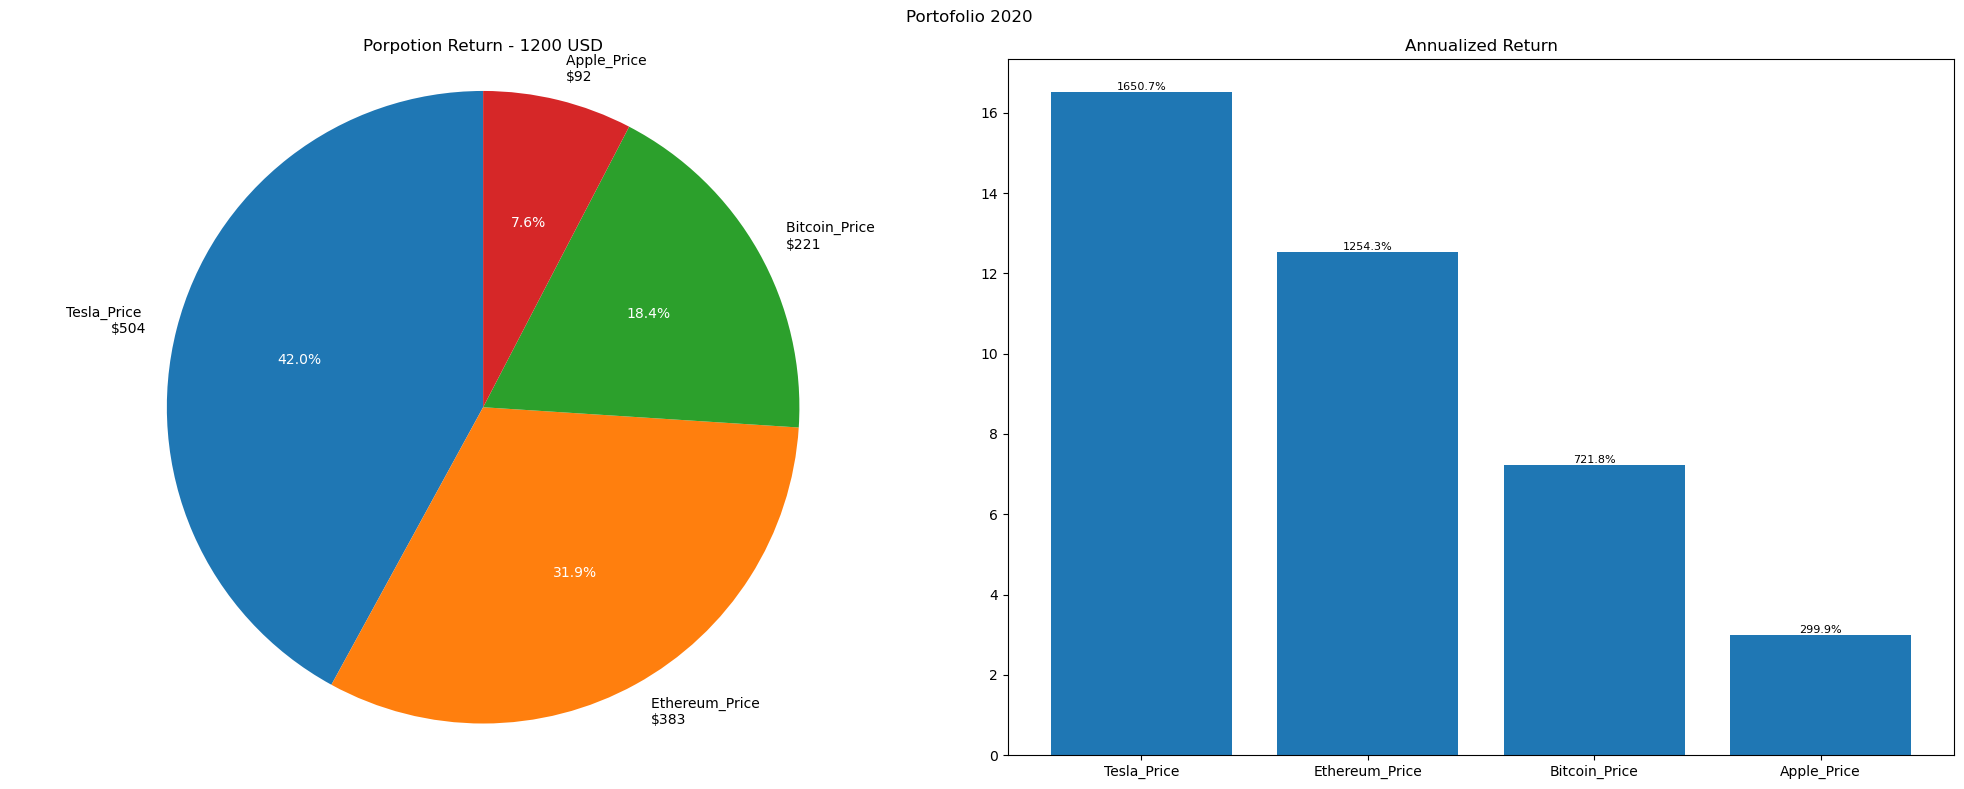

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle(f"Portofolio {tahun}")

sizes = positive_returns['Allocation_Pct']

labels = []
for i, row in positive_returns.iterrows():
  asset = row['Asset']
  allocation_usd = row['Allocation_USD']
  labels.append(f"{asset} \n${allocation_usd:.0f}")

wedges, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})

for autotext in autotexts:
  autotext.set_color('white')

ax1.axis('equal')
ax1.set_title(f"Porpotion Return - {jumlah_investasi} USD")

returns_bar = positive_returns['Annualized_return']
ax2.bar(positive_returns['Asset'], returns_bar)
for i, value in enumerate(returns_bar):
  ax2.text(i, value, f'{value:.1%}', ha='center', va='bottom', fontsize=8)

ax2.set_title(f"Annualized Return")

plt.tight_layout()
plt.show()

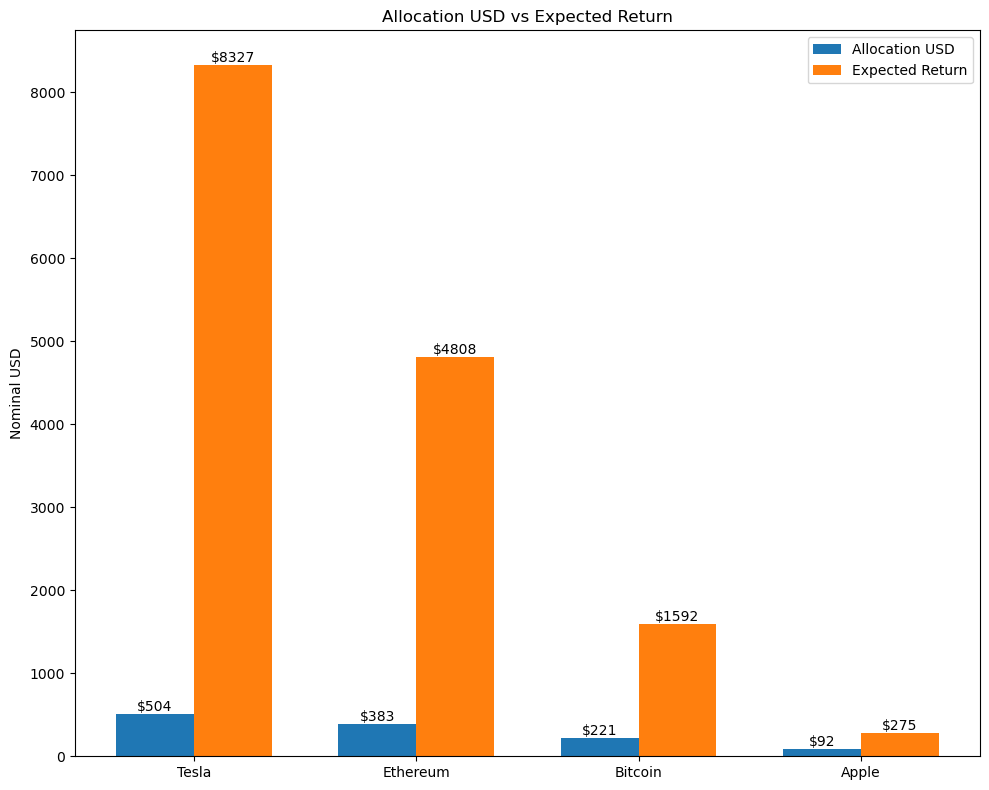

In [52]:
assets = positive_returns['Asset'].str.replace('_Price', '')
expect_return = positive_returns['Expect_return']
allocated_usd = positive_returns['Allocation_USD']

x = np.arange(len(assets))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 8))

bar1 = ax.bar(x - width/2, allocated_usd, width, label='Allocation USD')
bar2 = ax.bar(x + width/2, expect_return, width, label='Expected Return')

ax.set_title('Allocation USD vs Expected Return')

ax.set_ylabel('Nominal USD')
ax.set_xticks(x)
ax.set_xticklabels(assets)
ax.legend()

for i in bar1:
  height =  i.get_height()
  ax.text(i.get_x() + i.get_width()/2, height, f'${height:.0f}', ha='center', va='bottom', fontsize=10)

for i in bar2:
  height =  i.get_height()
  ax.text(i.get_x() + i.get_width()/2, height, f'${height:.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()